# Installing 3rd party libraries

## conda/mamba vs pip
### pip:
- Python package installer.
- Installs packages from the Python Package Index ([PyPI](https://pypi.org/)).
- comes with your python installation
- you need some other tool for managing virtual environments
- most packages are available on PyPI
- but sometimes they need compilation, making installation more difficult

### conda/mamba:
- Cross-language package manager (Python, R, Ruby, Lua, Scala, Java, JavaScript, C/C++, FORTRAN).
- Installs packages from the Anaconda repository (or the community `conda-forge` [repository](https://conda-forge.org/))
- needs to be installed separately
- Environment management built-in
- licensing issues using the conda repositories for commercial purposes.
  - conda-forge (used by default in mamba) is fine though
- some packages that need compilation are available as pre-built binaries from conda, making installation easier in some cases

## So what should I do?
- use conda/mamba for managing virtual environments
  - `conda create -n <NAME> python=<VERSION>`
  - `conda activate` / `conda deactivate`
  - `conda env list`
  - `conda env remove -n <NAME>`

- use pip for installing packages. Will always install into the currently active environment.
  - `pip install <PACKAGE_NAME>==<VERSION>` (install into current environment, version spec is optional)
  - `pip install --upgrade <PACKAGE_NAME>` (update package to latest available version)
  - `pip uninstall <PACKAGE_NAME>` (remove package from current environment)
  - `pip install -r requirements.txt` (install all packages listed in requirements file)
  - `pip list` (display list of all installed packages)

- use conda/mamba for installing packages only if you can not install the package using pip
- in case of problems (very rare):
  - first create a new environment with only python
  - then use conda/mamba to install all those packages you can not install via pip
  - then use pip to install remaining packages

# numpy

- **the** most important library for working with numerical data
- basis for a whole host of other libraries forming a vast ecosystem around numpy
  - **scipy**: mathematical analysis
  - **pandas**: tabular data & statistics
  - **matplotlib** / **plotnine**: graphic visualizations
  - **scikit-learn**: machine learning
  - **tensorflow** / **pytorch**: deep learning
  - and many more, for statistics, signal processing, simulations, graphs & networks, astronomy, bioinformatics, chemistry, quantum computing, ...
- see [the overall website](https://www.numpy.org) and [the user guide](https://numpy.org/doc/stable/user/index.html) for additional information

## what do you get in numpy?

> numpy provides a **multidimensional array object**, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

### What’s the difference between a Python list and a NumPy array?

> NumPy gives you an enormous range of fast and efficient ways of creating arrays and manipulating numerical data inside them. While a Python list can contain different data types within a single list, all of the elements in a NumPy array should be homogeneous. The mathematical operations that are meant to be performed on arrays would be extremely inefficient if the arrays weren’t homogeneous.

### Why use NumPy?

> NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further.


### And what are these magical arrays?
> An array is a central data structure of the NumPy library. An array is a grid of values and it contains information about the raw data, how to locate an element, and how to interpret an element. It has a grid of elements that can be indexed in various ways. The elements are all of the same type, referred to as the array dtype.

> An array can be indexed by a tuple of nonnegative integers, by booleans, by another array, or by integers. The rank of the array is the number of dimensions. The shape of the array is a tuple of integers giving the size of the array along each dimension.

> One way we can initialize NumPy arrays is from Python lists, using nested lists for two- or higher-dimensional data.

(everything above from the numpy documentation)

## Installation and Import

In [1]:
!/home/atreju/.conda/envs/dhbw/bin/pip install numpy  # the exclamation mark just passes the command to a shell

In [2]:
import numpy as np  # convention! numpy is very, very often imported as `np`

that's it. nothing more to be done

## Numpy Arrays
- `np.array` class
- strongly and statically typed. The type is referred to as the arrays' `dtype`
- multidimensional. your array can have any number of dimensions
- sized: has a fixed (pre-allocated) size along each dimension

<div class="alert alert-block alert-info">
<b>Nomenclature:</b> <br>
<a>
    A numpy array can have any number of dimensions. It is always an instance of `np.array`, no matter how many dimensions it has.<br>
    People (mathematicans) sometimes talk about vectors, matrices or tensors. It don't matter to us, all of these are `np.array`s.<br>
    People (computer scientists) sometimes talk about 1D-, 2D-, or ndarrays.  It don't matter to us, all of these are `np.array`s.
</a>
</div>

In [4]:
import numpy as np  # convention! numpy is very, very often imported as `np`
import string

### arrays and their contents

In [5]:
arr = np.array([1, 2, 3, 4, 5, 6])
arr

array([1, 2, 3, 4, 5, 6])

In [6]:
# arrays have a type:
arr.dtype

dtype('int64')

In [7]:
# and we can convert it to an array of a different type
float_array = arr.astype(float)
float_array

array([1., 2., 3., 4., 5., 6.])

In [8]:
float_array.dtype

dtype('float64')

In [9]:
# we can use python types in the conversion
arr.astype(str)

array(['1', '2', '3', '4', '5', '6'], dtype='<U21')

In [10]:
arr.astype(bool)

array([ True,  True,  True,  True,  True,  True])

In [11]:
arr.astype(complex)

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j, 5.+0.j, 6.+0.j])

In [12]:
# but the `dtype` attribute might look not so familiar -- in particular it's not just 'int' here...
arr.dtype

dtype('int64')

In [13]:
# numpy dtype contains more explicit information on type of data, size of data, byte order etc.
# but the types are really also /different/ from the python types (regardless of using the python types in 'astype')
# for example this also means values in numpy integer arrays are **not** unlimited size (unlike regular python integers)
print(f'{arr.dtype.itemsize=}, {arr.dtype.byteorder=}, {arr.dtype.name=}')

arr.dtype.itemsize=8, arr.dtype.byteorder='=', arr.dtype.name='int64'


In [14]:
arr[0] = 10**100

OverflowError: Python int too large to convert to C long

In [19]:
# the exception is the 'object' dtype
object_array = arr.astype('object')

In [20]:
object_array

array([1, 2, 3, 4, 5, 6], dtype=object)

In [21]:
object_array[0] = 10**100

In [22]:
object_array

array([10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,
       2, 3, 4, 5, 6], dtype=object)

In [23]:
# so: you **can** use the 'object' dtype, where the array just contains pointers to python objects
# but only do that if you really, really must. array operations on native numeric types are /much/ faster 
# than on 'object'

In [24]:
# watch out when using string, those are limited in size!
string_array = np.array(['a', 'b', 'c'])
string_array

array(['a', 'b', 'c'], dtype='<U1')

In [25]:
string_array[0] = 'xyz'

In [26]:
# whoopsie, only room for one character... (and no error message during the assignment)
string_array

array(['x', 'b', 'c'], dtype='<U1')

In [27]:
# at least it's enough room for a full unicode code point :)
string_array[0] =  '\U0001F622'
string_array

array(['😢', 'b', 'c'], dtype='<U1')

In [28]:
string_array = string_array.astype('U256')  # you can make the size explicit!
string_array[0] = 'xyz'
string_array

array(['xyz', 'b', 'c'], dtype='<U256')

In [29]:
string_array.astype('object')  # or use the object type (ok-ish for string)

array(['xyz', 'b', 'c'], dtype=object)

### creating more arrays

In [30]:
# creating arrays from (nested) lists
arr = np.array(
    [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]
)

In [31]:
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [32]:
# you can also create pre-initialized arrays of any size
np.zeros((3, 5), dtype=int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [33]:
# you can also create pre-initialized arrays of any size
np.ones((3, 5), dtype=int)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [34]:
# or non-initialized arrays (slightly faster)
np.empty((3, 5), dtype=int)

array([[106481475722711,               0,               0,
                      0,               0],
       [              0,               0,               0,
                      0,               0],
       [              0,               0,               0,
                      0,             128]])

In [35]:
# you can also create ranges -- very similar to the built-in `range`
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# and, often useful, a fixed number regularly spaced elements in a certain range (including bounds)
np.linspace(1, 2, 21)

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [37]:
# two special methods for two-dimensional arrays, often useful in linear algebra

In [38]:
# creating unit matrices
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [39]:
# creating diagonal matrices, specifying elemens on the diagonal
np.diag([97, 98, 99])

array([[97,  0,  0],
       [ 0, 98,  0],
       [ 0,  0, 99]])

### multi-dimensional arrays

In [40]:
# create a matrix, aka 2D-array
arr = np.zeros((3, 5), dtype=int)

In [41]:
arr

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [42]:
# figuring out the number of dimensions
arr.ndim

2

In [43]:
# and the number of entries along each dimension
arr.shape  # two axes, length 3 and 5 respectively

(3, 5)

In [44]:
# total number of elements (product of all elements of arr.shape)
arr.size

15

In [45]:
# you can index into elements in multi-dimensional arrays within a single []
arr[1, 2] = 1
arr

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [46]:
# using multiple `[]`-pairs also works, but is less inefficient, as a separate intermediate view is created this way
arr[0, 2] == arr[0][2] 

np.True_

In [47]:
# and you can use multi-dimensional slicing as well
# in many arithmetic operations the arguments are automatically 'broadcast' to the correct shape -- more later
arr[1, :] += 2
arr[:, 2] += 2
arr

array([[0, 0, 2, 0, 0],
       [2, 2, 5, 2, 2],
       [0, 0, 2, 0, 0]])

In [48]:
# just leaving out a dimension is the same as `:` for any following dimensions
arr[1]

array([2, 2, 5, 2, 2])

In [49]:
arr[1, :]

array([2, 2, 5, 2, 2])

In [50]:
# and no-one said we're limited to two dimensions
five_d_array = np.ones((1, 2, 3, 4, 5), dtype=int)
five_d_array

array([[[[[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]]],


        [[[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]]]]])

In [52]:
five_d_array[0, 0, 0]  # indexing the first three axes out leaves me with the last two (4x5)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [53]:
# of course I get a different (4x5)-section if I use different indices in the first dimensions
# (broadcasting again, btw)
five_d_array[0, 0, 0] = 0
five_d_array[0, 0, 1] = 1
five_d_array[0, 0, 2] = 2
five_d_array[0, 1, 0] = 5
five_d_array[0, 1, 1] = 6
five_d_array[0, 1, 2] = 7
five_d_array

array([[[[[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[2, 2, 2, 2, 2],
          [2, 2, 2, 2, 2],
          [2, 2, 2, 2, 2],
          [2, 2, 2, 2, 2]]],


        [[[5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5],
          [5, 5, 5, 5, 5]],

         [[6, 6, 6, 6, 6],
          [6, 6, 6, 6, 6],
          [6, 6, 6, 6, 6],
          [6, 6, 6, 6, 6]],

         [[7, 7, 7, 7, 7],
          [7, 7, 7, 7, 7],
          [7, 7, 7, 7, 7],
          [7, 7, 7, 7, 7]]]]])

<div class="alert alert-block alert-warning">
<b>Slicing creates views:</b> <br>
<a>
<p>Whenever you use indexing/slicing to access parts of an array what you get is a `view` in numpy language. A reference, effectively. It points to the area of memory, so changing the view also changes the original. </p>
use `np.copy` as necessary
</a>
</div>

### reshaping arrays

In [54]:
# I can change shape (and dimensionality) of an array
np.arange(100).reshape((10, 10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [55]:
np.arange(100).reshape((2, 5, 10))

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

       [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

In [56]:
# or I can `flatten` (= remove dimensions)
five_d_array.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [57]:
# there's also `ravel` which looks the same
# `flatten` creates a new object, while `ravel` gives you a reference to the original object, it just looks different to you
five_d_array.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [58]:
arr = np.arange(4).reshape(2, 2)
arr

array([[0, 1],
       [2, 3]])

In [59]:
raveled_arr = arr.ravel()
flattened_arr = arr.flatten()

In [60]:
flattened_arr

array([0, 1, 2, 3])

In [61]:
flattened_arr[1] = 4
flattened_arr

array([0, 4, 2, 3])

In [62]:
arr

array([[0, 1],
       [2, 3]])

In [63]:
raveled_arr

array([0, 1, 2, 3])

In [64]:
raveled_arr[1] = 4
raveled_arr

array([0, 4, 2, 3])

In [65]:
arr

array([[0, 4],
       [2, 3]])

In [66]:
# reshaping can add extra dimensions (as long as the total number of entries stays the same)
np.arange(10).reshape(1, 1, 1, 2, 5, 1)

array([[[[[[0],
           [1],
           [2],
           [3],
           [4]],

          [[5],
           [6],
           [7],
           [8],
           [9]]]]]])

### logical indexing

In [67]:
arr = np.arange(9)

In [68]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [69]:
arr > 5

array([False, False, False, False, False, False,  True,  True,  True])

In [70]:
# logical indexing
# use an array the same shape as your original array, with boolean values
arr[arr > 5]

array([6, 7, 8])

In [71]:
# of course you can have anything that gives you boolean values with the right shape
arr[arr % 2 == 0]

array([0, 2, 4, 6, 8])

In [72]:
# and you can combine conditions with a single (!) `&`, `|` or `^`
# (requires brackets due to operator precedence...)
arr[(arr > 5) & (arr % 2 == 0)]

array([6, 8])

In [73]:
arr[(arr > 5) ^ (arr % 2 == 0)]

array([0, 2, 4, 7])

In [74]:
# you can also get the indexes meeting some condition
np.where(arr > 5)

(array([6, 7, 8]),)

In [75]:
# and you can also index with those if you like
arr[np.where(arr > 5)]

array([6, 7, 8])

In [76]:
# of course that's also possible in higher dimensions
arr = arr.reshape(3, 3)

In [77]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [78]:
# logical indexing collapsed the dimensions
arr[arr % 2 == 0]

array([0, 2, 4, 6, 8])

In [79]:
# in multi-dimensional arrays `where ` returns a tuple with one array for each axis
np.where(arr % 2 == 0)

(array([0, 0, 1, 2, 2]), array([0, 2, 1, 0, 2]))

In [80]:
# and you can use these tuples for indexing still
arr[np.where(arr % 2 == 0)]

array([0, 2, 4, 6, 8])

In [81]:
# but if you'd rather have 'coordinates' instead:
even_indices = np.where(arr % 2 == 0)
list(zip(*even_indices))

[(np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(2)),
 (np.int64(1), np.int64(1)),
 (np.int64(2), np.int64(0)),
 (np.int64(2), np.int64(2))]

### combining and splitting arrays

In [82]:
arr1 = np.array([[1, 1], [2, 2]])
arr1

array([[1, 1],
       [2, 2]])

In [83]:
arr2 = np.array([[3, 3], [4, 4]])
arr2

array([[3, 3],
       [4, 4]])

In [84]:
# stack them 'horizontally' (inner-most dimension)
h_stacked = np.hstack([arr1, arr2])
h_stacked

array([[1, 1, 3, 3],
       [2, 2, 4, 4]])

In [85]:
h_stacked.shape

(2, 4)

In [86]:
# stack them 'vertically' (outer-most dimension)
v_stacked = np.vstack([arr1, arr2])
v_stacked

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [87]:
v_stacked.shape

(4, 2)

In [88]:
# obviously the dimensions need to match
np.hstack([np.ones((2, 2)), np.ones((3, 2))])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 3

In [89]:
# you can also split arrays
# you can specify into how many segments to split
split_arr1, split_arr2 = np.hsplit(h_stacked, 2)

In [91]:
split_arr1

array([[1, 1],
       [2, 2]])

In [92]:
split_arr2

array([[3, 3],
       [4, 4]])

In [93]:
# of course you could also split the other way around
np.vsplit(h_stacked, 2)

[array([[1, 1, 3, 3]]), array([[2, 2, 4, 4]])]

In [94]:
# splits specified this way need to divide the dimension length
np.split(h_stacked, 3)

ValueError: array split does not result in an equal division

In [95]:
# but if you specify split points rathern than #splits you're free to create unequal parts
# if you want to specify one (or multiple) splitting points, pass a tuple
np.hsplit(h_stacked, (1, 3))

[array([[1],
        [2]]),
 array([[1, 3],
        [2, 4]]),
 array([[3],
        [4]])]

In [96]:
# for higher-dimensional arrays, use `np.split` and specify the axis
cube_array = np.arange(27).reshape((3, 3, 3))
cube_array

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [97]:
np.split(cube_array, (1, ), axis=0)

[array([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]]),
 array([[[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],
 
        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])]

In [98]:
np.split(cube_array, (1, ), axis=1)

[array([[[ 0,  1,  2]],
 
        [[ 9, 10, 11]],
 
        [[18, 19, 20]]]),
 array([[[ 3,  4,  5],
         [ 6,  7,  8]],
 
        [[12, 13, 14],
         [15, 16, 17]],
 
        [[21, 22, 23],
         [24, 25, 26]]])]

In [99]:
np.split(cube_array, (1, ), axis=2)

[array([[[ 0],
         [ 3],
         [ 6]],
 
        [[ 9],
         [12],
         [15]],
 
        [[18],
         [21],
         [24]]]),
 array([[[ 1,  2],
         [ 4,  5],
         [ 7,  8]],
 
        [[10, 11],
         [13, 14],
         [16, 17]],
 
        [[19, 20],
         [22, 23],
         [25, 26]]])]

### Broadcasting

> The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

In [100]:
arr_1 = np.arange(1, 4)
arr_2 = np.ones(3)

In [101]:
arr_1 + arr_2

array([2., 3., 4.])

In [102]:
# but just adding a (scalar) 1 works just as well...?
arr_1 + 1.

array([2., 3., 4.])

In [103]:
# same for division (or any other math operation
arr_2 / arr_1

array([1.        , 0.5       , 0.33333333])

In [104]:
1 / arr_1

array([1.        , 0.5       , 0.33333333])

> NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape. <br>
> NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation, as above.<br>
> General rules: When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when **they are equal**, or **one of them is 1**.<br>
> Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions

In [105]:
# example: let's create a 4x4x3 array (imagine: 4x4 pixels, 3 color channels for example
arr = np.zeros((4, 4, 3))
# the first row is all red
arr[0, :, 0] = 1
# the second row is all green
arr[1, :, 1] = 1
# the third row is all blue
arr[2, :, 2] = 1
# and the last row is white
arr[3, :, :] = 1
arr

array([[[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [106]:
# another way to look at this:
# here's the red contributions on the screen
arr[..., 0]

array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.]])

In [107]:
# let's make everything less blue. we half the blues:
# broadcasting takes care of giving us the right shape
arr / np.array([1, 1, 2])

array([[[1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ]],

       [[0. , 1. , 0. ],
        [0. , 1. , 0. ],
        [0. , 1. , 0. ],
        [0. , 1. , 0. ]],

       [[0. , 0. , 0.5],
        [0. , 0. , 0.5],
        [0. , 0. , 0.5],
        [0. , 0. , 0.5]],

       [[1. , 1. , 0.5],
        [1. , 1. , 0.5],
        [1. , 1. , 0.5],
        [1. , 1. , 0.5]]])

<div class="alert alert-block alert-info">
<b>another curse of dimensionality:</b> <br>
<p>
    These broadcasting rules are incredibly useful.<br>
    They are also nice and easy to understand if one side is a scalar.<br>
    If both sides are arrays, and one (or both) of these arrays are very high-dimensional they can become pretty unwieldy....</p>
</div>

## Advanced Topics:
- `numpy.linalg` -- Linear Algebra: just leave it to scipy
- `numpy.matlib` -- matrices: just use plain arrays and make the (scipy) calls explicit
- `ufunc`s: vectorized element-wise functions on arrays. You're using those already, there's more (technical) details though...
- `numpy.ctypeslib`, `numpy.datetime`, `numpy.fft`, masked arrays, various utility functions, ...

# pandas
- 'fast, powerful, flexible and easy to use open source data analysis and manipulation tool'
- functionality looks a bit like execel sheets / relational tables
- built on top of numpy
- two main datastructures:
  - `Series`: 1D Data -- typically single column, multiple rows
  - `DataFrame`: 2D Data -- multiple rows, multiple columns
- generally: avoid looping over rows of `DataFrames`: you can almost always achieve your goal using vectorized operations, joins etc.

## Installation and Import

In [108]:
!/home/atreju/.conda/envs/dhbw/bin/pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 7.5 MB/s  0:00:01 eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]━━━━━━━━━━━ 2/3 [pandas]


In [109]:
import numpy as np
import pandas as pd  # convention, as usual

## pd.Series Basics
- one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).
- The axis labels are collectively referred to as the index. 

### creating a Series
- can be easily created from lists/numpy arrays/dicts/scalars

In [110]:
# create a Series from a list/numpy array
pd.Series([3, 4, 5])

0    3
1    4
2    5
dtype: int64

In [111]:
# and specify an index while you're at it
pd.Series([3, 4, 5], index=['a', 'b', 'c'])

a    3
b    4
c    5
dtype: int64

In [112]:
# or you can create it from a dictionary
pd.Series({'a': 3, 'b': 4, 'c': 5})

a    3
b    4
c    5
dtype: int64

In [113]:
# or from constants, basically like broadcasting. 
pd.Series(3, index=['a', 'b', 'c'])

a    3
b    3
c    3
dtype: int64

In [114]:
# what's the difference to just the plain array/list?
s = pd.Series(3, index=['a', 'b', 'c'])
s['a']

np.int64(3)

### Series properties
- dtypes, math + broadcasting, names, ...

In [115]:
# you can get out the index again
s = pd.Series({'a': 3, 'b': 4, 'c': 5})
s.index

Index(['a', 'b', 'c'], dtype='object')

In [116]:
# and there's a single datatype for a Series, usually one of the numpy types
s.dtype

dtype('int64')

In [117]:
# just like numpy you can do vectorized math according to numpy broadcasting rules
s + 2

a    5
b    6
c    7
dtype: int64

In [118]:
# and a `pd.Series` can be used in many numpy functions directly (preserving, but not modifying the index)
np.sqrt(s)

a    1.732051
b    2.000000
c    2.236068
dtype: float64

In [119]:
# and you can get a real numpy array out of it if you need to
arr = s.to_numpy()
arr

array([3, 4, 5])

In [120]:
type(arr)

numpy.ndarray

In [121]:
arr.dtype

dtype('int64')

In [122]:
# a Series can also have a `name`, behaving sort of like a column label
s = pd.Series({'a': 3, 'b': 4, 'c': 5}, name='series_name')
s

a    3
b    4
c    5
Name: series_name, dtype: int64

In [123]:
# and you can change the name, of course
s.rename('new_name')

a    3
b    4
c    5
Name: new_name, dtype: int64

### Indexing
- indexing of rows by index value simply using []
- indexing of rows by numerical row-number using `.iloc`
- logical indexing like in numpy also works
- no indexing of columns, since there's only one :)

In [124]:
s = pd.Series({'a': 3, 'b': 4, 'c': 5})
s

a    3
b    4
c    5
dtype: int64

In [125]:
# square bracket indexing returns the row with matching index
s['a']

np.int64(3)

In [126]:
# you can slice with non-numeric indices
s['a':'c':2] *= 2
s

a     6
b     4
c    10
dtype: int64

In [127]:
# alternatively, use `Series.loc (more interesting for DataFrames)
s.loc['a':'b']

a    6
b    4
dtype: int64

In [128]:
# and iff the row name is a valid python variable name you can also access it as an attribute (but no slicing here)
s.a

np.int64(6)

In [129]:
# you can also use numerical indices -- row number, effectively
s.iloc[1]

np.int64(4)

In [130]:
# and you can use logical indexing
s[s > 4]

a     6
c    10
dtype: int64

In [131]:
# you can create new rows simply by indexing and assignment
# (but this is rather slow)
s['foo'] = 5
s

a       6
b       4
c      10
foo     5
dtype: int64

In [132]:
# and rows can be removed again using `del`
# (again, rather slow)
del s['foo']
s

a     6
b     4
c    10
dtype: int64

### Automatic alignment
- operations combining two Series objects automatically consider the index in all element-wise operations

In [133]:
s1 = pd.Series({'a': 3, 'b': 4, 'c': 5           })
s2 = pd.Series({        'b': 14, 'c': 15, 'd': 16})

In [134]:
s1 + s2

a     NaN
b    18.0
c    20.0
d     NaN
dtype: float64

## pd.DataFrame Basics
- 2-dimensional labeled data structure with columns of **potentially different** types
- pretty much like a spreadsheet or SQL table
- index for both rows and columns (and indices can be hierarchical)
- most commonly used and most important pandas object

### creating a DataFrame
- can easily be created from dicts of lists, lists of dicts, Series, ...
- or (commonly) read from files

In [135]:
data = {
    'first_column': [1, 2, 3, 4, 5],
    'second_column': [1, 2, 3.1415, 4, 5]
}
df = pd.DataFrame(data)
df

,first_column,second_column
0,1,1.0000
1,2,2.0000
2,3,3.1415
3,4,4.0000
4,5,5.0000


In [136]:
# or with more interesting row index
data = {
    'first_column': [1, 2, 3, 4, 5],
    'second_column': [1, 2, 3.1415, 4, 5]
}
df = pd.DataFrame(data, index = ['a', 'b', 'c', 'd', 'e'])
df

,first_column,second_column
a,1,1.0000
b,2,2.0000
c,3,3.1415
d,4,4.0000
e,5,5.0000


In [137]:
# or read from a large variety of file formats
pd.read_csv('../data/iris.csv')

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [138]:
pd.read_

AttributeError: module 'pandas' has no attribute 'read_'

### DataFrame properties

In [139]:
data = {
    'first_column': [1, 2, 3, 4, 5],
    'second_column': [1, 2, 3.1415, 4, 5]
}
df = pd.DataFrame(data, index = ['a', 'b', 'c', 'd', 'e'])
df

,first_column,second_column
a,1,1.0000
b,2,2.0000
c,3,3.1415
d,4,4.0000
e,5,5.0000


In [140]:
# you can get out the index again
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [141]:
# but now there's also an index for the columns
df.columns

Index(['first_column', 'second_column'], dtype='object')

In [142]:
# and the dtype is now column-specific
df.dtypes

first_column       int64
second_column    float64
dtype: object

In [143]:
# you also have a shape, same as in numpy
df.shape

(5, 2)

In [144]:
# just like numpy you can do vectorized math according to numpy broadcasting rules
df + 2

,first_column,second_column
a,3,3.0000
b,4,4.0000
c,5,5.1415
d,6,6.0000
e,7,7.0000


In [145]:
# or pass it to numpy functions (if the datatypes of all columns are compatible of course)
# this will automatically upcast column dtypes as necessary
np.sqrt(df)

,first_column,second_column
a,1.000000,1.000000
b,1.414214,1.414214
c,1.732051,1.772428
d,2.000000,2.000000
e,2.236068,2.236068


In [146]:
np.sqrt(df).dtypes

first_column     float64
second_column    float64
dtype: object

In [147]:
# you can still convert it to a single numpy array
df_arr = df.to_numpy()
df_arr

array([[1.    , 1.    ],
       [2.    , 2.    ],
       [3.    , 3.1415],
       [4.    , 4.    ],
       [5.    , 5.    ]])

In [148]:
# but that needs to bring all columns to a common type by upcasting
df_arr.dtype

dtype('float64')

In [149]:
# more interestin type mixing
data = {
    'first_column': [1, 2, 3, 4, 5],
    'second_column': ['foo', 'bar', 'bazz', 'here', 'there']
}
df = pd.DataFrame(data, index = ['a', 'b', 'c', 'd', 'e'])
df

,first_column,second_column
a,1,foo
b,2,bar
c,3,bazz
d,4,here
e,5,there


In [150]:
df.dtypes

first_column      int64
second_column    object
dtype: object

In [151]:
# obviously these kinds of operations only work on compatible column types
df + 2

TypeError: can only concatenate str (not "int") to str

In [152]:
# and the last resort for upcasting mixed types is `object`
df.to_numpy()

array([[1, 'foo'],
       [2, 'bar'],
       [3, 'bazz'],
       [4, 'here'],
       [5, 'there']], dtype=object)

### indexing
- square brackets now index columns, not rows
- `.loc` allows indexing of both rows and column
- `.iloc` allows numerical row/column-indices
- logical indexing now doesn't reduce the size, but just replaces unselected values by `NaN`. Use `.dropna` to actually remove rows

In [153]:
data = {
    'first_column': [1, 2, 3, 4, 5],
    'second_column': [1, 2, 3.1415, 4, 5]
}
df = pd.DataFrame(data, index = ['a', 'b', 'c', 'd', 'e'])
df

,first_column,second_column
a,1,1.0000
b,2,2.0000
c,3,3.1415
d,4,4.0000
e,5,5.0000


In [154]:
# normal indexing gives me a column
df['first_column']

a    1
b    2
c    3
d    4
e    5
Name: first_column, dtype: int64

In [155]:
# but (watch out!) a slice in the same position will be applied to rows, not columns
df['a'::2]

,first_column,second_column
a,1,1.0000
c,3,3.1415
e,5,5.0000


In [156]:
# you can also access the column as an attribute if it's a valid python variable name
df.second_column

a    1.0000
b    2.0000
c    3.1415
d    4.0000
e    5.0000
Name: second_column, dtype: float64

In [157]:
# `.loc` by default will be a row-index still
df.loc['a']

first_column     1.0
second_column    1.0
Name: a, dtype: float64

In [158]:
# but I can pass the column as second argument
df.loc['c', 'first_column']

np.int64(3)

In [159]:
# slicing still works also in `.loc`
# and also, I can select multiple rows (or columns) by indexing with a list/tuple
df.loc['a':'d':2, ('first_column', 'second_column')]

,first_column,second_column
a,1,1.0000
c,3,3.1415


In [160]:
# and even re-order the index that way
df.loc[('a', 'c', 'b'), 'first_column'::2]

,first_column
a,1
c,3
b,2


In [161]:
# `.iloc` for numerical indicies into both rows and columns, otherwise working like `.loc`
df.iloc[-1, :]

first_column     5.0
second_column    5.0
Name: e, dtype: float64

In [162]:
# logical indexing will simply set all non-selected values to NaN
df[df > 3]

,first_column,second_column
a,NaN,NaN
b,NaN,NaN
c,NaN,3.1415
d,4.0,4.0000
e,5.0,5.0000


In [163]:
# use dropna to actuall git rid of extra rows/columns
df[df > 3].dropna(how='any')

,first_column,second_column
d,4.0,4.0
e,5.0,5.0


In [164]:
# decide on dropping rows where any value is NaN, or all values are NaN
df[df > 3].dropna(how='all')

,first_column,second_column
c,NaN,3.1415
d,4.0,4.0000
e,5.0,5.0000


In [165]:
# you can again add columns (or rows) using indexing + assignment
df['new_column'] = [11, 12, 13, 14, 15]
df

,first_column,second_column,new_column
a,1,1.0000,11
b,2,2.0000,12
c,3,3.1415,13
d,4,4.0000,14
e,5,5.0000,15


In [166]:
# obviously the length needs to be broadcastable
df['new_column'] = [11, 12, 13]

ValueError: Length of values (3) does not match length of index (5)

In [167]:
# broadcasting works just fine here
df['new_column'] = 5
df

,first_column,second_column,new_column
a,1,1.0000,5
b,2,2.0000,5
c,3,3.1415,5
d,4,4.0000,5
e,5,5.0000,5


In [168]:
# same for rows, using loc
df.loc['f', :] = [6, 6., 5]
df

,first_column,second_column,new_column
a,1.0,1.0000,5.0
b,2.0,2.0000,5.0
c,3.0,3.1415,5.0
d,4.0,4.0000,5.0
e,5.0,5.0000,5.0
f,6.0,6.0000,5.0


In [169]:
# or both could be new
df.loc['g', 'some_column'] = 42
df

,first_column,second_column,new_column,some_column
a,1.0,1.0000,5.0,NaN
b,2.0,2.0000,5.0,NaN
c,3.0,3.1415,5.0,NaN
d,4.0,4.0000,5.0,NaN
e,5.0,5.0000,5.0,NaN
f,6.0,6.0000,5.0,NaN
g,NaN,NaN,NaN,42.0


### Automatic Alignment
- for `DataFrame`s alignment happens on both rows and columns

In [170]:
df1 = pd.DataFrame(np.ones((6, 4)), columns=['A', 'B', 'C', 'D'], index=['a', 'b', 'c', 'd', 'e', 'f'])
df2 = pd.DataFrame(np.ones((3, 3)), columns=['A', 'C', 'D'], index=['b', 'd', 'f'])
df1 + df2


,A,B,C,D
a,NaN,NaN,NaN,NaN
b,2.0,NaN,2.0,2.0
c,NaN,NaN,NaN,NaN
d,2.0,NaN,2.0,2.0
e,NaN,NaN,NaN,NaN
f,2.0,NaN,2.0,2.0


In [171]:
# but you can manually specify a 'fill value' to use if one of the DataFrames is NaN
df1.add(df2, fill_value=0)

,A,B,C,D
a,1.0,1.0,1.0,1.0
b,2.0,1.0,2.0,2.0
c,1.0,1.0,1.0,1.0
d,2.0,1.0,2.0,2.0
e,1.0,1.0,1.0,1.0
f,2.0,1.0,2.0,2.0


In [172]:
df = pd.DataFrame(np.arange(15).reshape(5, 3), columns=['A', 'B', 'C'])
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [173]:
# operations between DataFrames and Series are broadcast row-wise
s = pd.Series([1, 1, 1], index=['A', 'B', 'C'])
df - s

,A,B,C
0,-1,0,1
1,2,3,4
2,5,6,7
3,8,9,10
4,11,12,13


In [176]:
# but only if the indices match will the result make much sense (automatic alignment again)
s = pd.Series([1, 1, 1], index=['X', 'B', 'Z'])
df - s

,A,B,C,X,Z
0,NaN,0.0,NaN,NaN,NaN
1,NaN,3.0,NaN,NaN,NaN
2,NaN,6.0,NaN,NaN,NaN
3,NaN,9.0,NaN,NaN,NaN
4,NaN,12.0,NaN,NaN,NaN


In [177]:
# so subtracting eg one columns from the rest doesn't work the way you think:
df - df.C

,A,B,C,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# you can use explicit dataframe methods if you want to apply arithmetic column-wise, specifying an axis
df.sub(df.C, axis=0)

,A,B,C
0,-2,-1,0
1,-2,-1,0
2,-2,-1,0
3,-2,-1,0
4,-2,-1,0


## Truthiness and comparison of DataFrames

In [179]:
data = {
    'first_column': [1, 2, 3, 4, 5],
    'second_column': [1, 2, 3.1415, 4, 5]
}
df = pd.DataFrame(data, index = ['a', 'b', 'c', 'd', 'e'])
df

,first_column,second_column
a,1,1.0000
b,2,2.0000
c,3,3.1415
d,4,4.0000
e,5,5.0000


In [180]:
if df > 0:
    print('It is indeed greater than 0')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [181]:
boolean_df = df > 0
boolean_df

,first_column,second_column
a,True,True
b,True,True
c,True,True
d,True,True
e,True,True


In [182]:
boolean_df.all()

first_column     True
second_column    True
dtype: bool

In [183]:
boolean_df.all(axis=1)

a    True
b    True
c    True
d    True
e    True
dtype: bool

In [184]:
boolean_df.all().all()

np.True_

In [185]:
if boolean_df.all().all():
    print('Actually, all the elements are True')

Actually, all the elements are True


In [187]:
df.loc['a', 'first_column'] = np.nan
df

,first_column,second_column
a,NaN,1.0000
b,2.0,2.0000
c,3.0,3.1415
d,4.0,4.0000
e,5.0,5.0000


In [188]:
# NaNs hiding in a DataFrame can make some things suprisingly false
df + df == 2*df

,first_column,second_column
a,False,True
b,True,True
c,True,True
d,True,True
e,True,True


In [189]:
(df + df == 2*df).all().all()

np.False_

In [190]:
# use `equals` to compare dataframes for equality instead
(df + df).equals(2*df)

True

## Summarizing DataFrames

In [191]:
df = pd.read_csv('../data/iris.csv')

In [192]:
# by default a limited number of rows (and columns) is printed
df

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [196]:
# look only at the first N rows
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [197]:
# or the last N rows
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,variety
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [198]:
# get some overview of datatypes and NULL/NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [199]:
# or some descriptive statistics (leaving out non-numeric columns)
# (you can specify your own percentiles, too)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [200]:
# describe also works on some non-numeric columns, just not in combination with numerical columns)
df.variety.describe()

count        150
unique         3
top       Setosa
freq          50
Name: variety, dtype: object

In [201]:
# unless you force it
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## sorting DataFrames

In [209]:
df = pd.DataFrame(
    np.random.randint(low=3, high=17, size=(5, 3)),
    columns=['col_1', 'col_2', 'col_3'],
    index=['e', 'a', 'x', 'y', 'b']
)
df

,col_1,col_2,col_3
e,5,5,6
a,13,14,8
x,14,5,6
y,14,10,8
b,13,6,11


In [210]:
# sort by index
df.sort_index()

,col_1,col_2,col_3
a,13,14,8
b,13,6,11
e,5,5,6
x,14,5,6
y,14,10,8


In [211]:
# sort by the values in one column (not stable!)
df.sort_values(['col_1'])

,col_1,col_2,col_3
e,5,5,6
a,13,14,8
b,13,6,11
x,14,5,6
y,14,10,8


In [212]:
# or by multiple columns (if there are ties in the first column)
df.sort_values(['col_1', 'col_3'])

,col_1,col_2,col_3
e,5,5,6
a,13,14,8
b,13,6,11
x,14,5,6
y,14,10,8


## `query` for convenient filtering

In [213]:
df = pd.read_csv('../data/iris.csv')

In [214]:
# not so super convenient to read
df[((df.variety == 'Setosa') & (df['petal_width'] > 0.4)) | ((df.variety == 'Virginica') & (df['sepal_width'] > 3.5))]

,sepal_length,sepal_width,petal_length,petal_width,variety
23,5.1,3.3,1.7,0.5,Setosa
43,5.0,3.5,1.6,0.6,Setosa
109,7.2,3.6,6.1,2.5,Virginica
117,7.7,3.8,6.7,2.2,Virginica
131,7.9,3.8,6.4,2.0,Virginica


In [215]:
# use a query string instead

df.query('(variety == "Setosa" and petal_width > 0.4) or (variety == "Virginica" and sepal_width > 3.5)')

,sepal_length,sepal_width,petal_length,petal_width,variety
23,5.1,3.3,1.7,0.5,Setosa
43,5.0,3.5,1.6,0.6,Setosa
109,7.2,3.6,6.1,2.5,Virginica
117,7.7,3.8,6.7,2.2,Virginica
131,7.9,3.8,6.4,2.0,Virginica


In [216]:
# of course you can just refer to column values in both sides of the comparison, and you can do math in the query...
df.query('sepal_length < 1.1*petal_length')

,sepal_length,sepal_width,petal_length,petal_width,variety
100,6.3,3.3,6.0,2.5,Virginica
106,4.9,2.5,4.5,1.7,Virginica
134,6.1,2.6,5.6,1.4,Virginica


In [217]:
# sometimes column names are not valid python identifiers:
renamed_df = df.rename(columns={'sepal_length': 'sepal length'})
renamed_df.head(3)

,sepal length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [218]:
# query doesn't work out of the box then
renamed_df.query('sepal length > 7')

SyntaxError: invalid syntax (<unknown>, line 1)

In [220]:
# but you can use backticks to escape such variable names
renamed_df.query('`sepal length` > 7')

,sepal length,sepal_width,petal_length,petal_width,variety
102,7.1,3.0,5.9,2.1,Virginica
105,7.6,3.0,6.6,2.1,Virginica
107,7.3,2.9,6.3,1.8,Virginica
109,7.2,3.6,6.1,2.5,Virginica
117,7.7,3.8,6.7,2.2,Virginica
118,7.7,2.6,6.9,2.3,Virginica
122,7.7,2.8,6.7,2.0,Virginica
125,7.2,3.2,6.0,1.8,Virginica
129,7.2,3.0,5.8,1.6,Virginica
130,7.4,2.8,6.1,1.9,Virginica


In [221]:
# you can refer to external variables by pre-fixing them with an @-sign
min_sepal_length = 7
df.query('sepal_length > @min_sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,variety
102,7.1,3.0,5.9,2.1,Virginica
105,7.6,3.0,6.6,2.1,Virginica
107,7.3,2.9,6.3,1.8,Virginica
109,7.2,3.6,6.1,2.5,Virginica
117,7.7,3.8,6.7,2.2,Virginica
118,7.7,2.6,6.9,2.3,Virginica
122,7.7,2.8,6.7,2.0,Virginica
125,7.2,3.2,6.0,1.8,Virginica
129,7.2,3.0,5.8,1.6,Virginica
130,7.4,2.8,6.1,1.9,Virginica


## aggregations
- return a single value for a series
- usually applied per-column (but could also be applied per-row)
- easy methods for aggregating multiple columns with multiple aggregation functions
- revisit later with windowing/grouping

**there are a large number of such functions we could apply**
- count: Number of non-NA observations
- sum: Sum of values
- prod: Product of values
- mean: Mean of values
- std: Sample standard deviation
- sem: Standard error of the mean
- var: Unbiased variance
- skew: Sample skewness (3rd moment)
- kurt: Sample kurtosis (4th moment)
- median: Arithmetic median of values
- quantile: Sample quantile (value at %)
- min/max: Smalles/Largest value
- idxmin/idxmax: Index of smallest/largest value
- mode: Most frequent value
- nunique: number of unique values
- cumsum/comprod: Cumulative sum/product
- cummax/cummin: Cumulative maximum/minimum
- ... probably more that I forgot

In [222]:
df = pd.read_csv('../data/iris.csv')

In [223]:
# applying an aggregation function to a dataframe applies the function column-wise
df.drop(columns='variety').mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [224]:
# I can apply it row-wise using the `axis` parameter
df.drop(columns='variety').mean(axis=1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [225]:
# sometimes we want to apply multiple aggregations, there's a convenient helper `aggregate`
df.drop(columns='variety').aggregate(['sum', 'mean', 'median', 'nunique'])

,sepal_length,sepal_width,petal_length,petal_width
sum,876.500000,458.600000,563.700,179.900000
mean,5.843333,3.057333,3.758,1.199333
median,5.800000,3.000000,4.350,1.300000
nunique,35.000000,23.000000,43.000,22.000000


In [226]:
# you can use your own functions -- the argument will be a series
# but the name is not very nice now...
df.drop(columns='variety').aggregate([lambda x: sum(x), lambda x: x.median()])

,sepal_length,sepal_width,petal_length,petal_width
<lambda>,876.5,458.6,563.70,179.9
<lambda>,5.8,3.0,4.35,1.3


In [227]:
def my_mean(s: pd.Series) -> float | str:
    if s.dtype.name != 'object':
        return sum(s) / len(s)
    return '<CAN NOT AGGREGATE OBJECTS>'

In [228]:
# if I used named functions rather than lambdas, the name of the function is assigned
df.aggregate([my_mean])

,sepal_length,sepal_width,petal_length,petal_width,variety
my_mean,5.843333,3.057333,3.758,1.199333,<CAN NOT AGGREGATE OBJECTS>


In [229]:
# I can also use aggregate with dictionary arguments, allowing me to apply separate functions for each column
df.aggregate(
    {
        'sepal_length': 'mean',
        'sepal_width': ['min', 'max']
    }
)

,sepal_length,sepal_width
mean,5.843333,NaN
min,NaN,2.0
max,NaN,4.4


In [230]:
# finally, you can use named arguments to select columns /and/ rename the output label
df.aggregate(
    sepal_length_mean=('sepal_length', lambda x: x.mean()),
    sepal_width_max=('sepal_width', lambda x: x.max()),
)

,sepal_length,sepal_width
sepal_length_mean,5.843333,NaN
sepal_width_max,NaN,4.4


In [231]:
# `agg` is an alias for `aggregate`
# documentation actually recommends using the `agg` alias
df.agg == df.aggregate

True

## Special Accessors
- `.str` for string columns
- `.dt` for timestamp columns

### `str` accessor
- makes string functions (eg `upper`, `lower`, indexing, ...) available as vectorized methods on a Series

In [232]:
df = pd.DataFrame(
    {
        'numeric': [1, 2, 3.1415, 4, 5],
        'text': ['hello', 'world', 'aint', 'this', 'fun']
    })
df

,numeric,text
0,1.0000,hello
1,2.0000,world
2,3.1415,aint
3,4.0000,this
4,5.0000,fun


In [233]:
# just a normal row index
df.text[0]

'hello'

In [234]:
# vectorized, returning the first character of each element
df['first_character'] = df.text.str[0]
df

,numeric,text,first_character
0,1.0000,hello,h
1,2.0000,world,w
2,3.1415,aint,a
3,4.0000,this,t
4,5.0000,fun,f


In [235]:
df['has_a'] = df.text.str.contains('a')
df

,numeric,text,first_character,has_a
0,1.0000,hello,h,False
1,2.0000,world,w,False
2,3.1415,aint,a,True
3,4.0000,this,t,False
4,5.0000,fun,f,False


### `.dt`-accessor
- just like the string accessor, but for datetime objects

In [237]:
df = pd.DataFrame({'ts': pd.date_range("20221201 09:10:12", periods=4, freq='ME', tz='utc'), 'value': np.arange(4)})
df

,ts,value
0,2022-12-31 09:10:12+00:00,0
1,2023-01-31 09:10:12+00:00,1
2,2023-02-28 09:10:12+00:00,2
3,2023-03-31 09:10:12+00:00,3


In [238]:
df.ts.dt.month_name()

0    December
1     January
2    February
3       March
Name: ts, dtype: object

In [239]:
df.ts.dt.month

0    12
1     1
2     2
3     3
Name: ts, dtype: int32

## apply functions to DataFrames
- apply functions to a whole table: `pipe`
- apply functions to rows/columns: `apply`
- apply functions to each element: `map`
- apply multiple functions to each element: `transform`

### pipe
- function argument is a dataframe
- function return is a dataframe

In [240]:
address_df = pd.DataFrame(dict(address = ['Frau Dr. Ute Herzog,  Esplanade 89,  31759 Teugn', 'Gaby Maier, Landsberger Allee 59, 31759 München']))
address_df

,address
0,"Frau Dr. Ute Herzog, Esplanade 89, 31759 Teugn"
1,"Gaby Maier, Landsberger Allee 59, 31759 München"


In [241]:
def extract_postcode_city(df):
    df['postcode_city'] = df['address'].str.split(',').str.get(-1).str.strip()
    return df

def extract_postcode(df):
    df['postcode'] = df['postcode_city'].str.split(' ').str.get(0).str.strip()
    return df

def extract_name(df):
    df['name'] = df['address'].str.split(',').str.get(0).str.strip()
    return df

def add_country_name(df, country):
    df['country'] = country
    return df

In [242]:
# applying all three is not very nice to read
extract_name(add_country_name(extract_postcode(extract_postcode_city(address_df)), ' DE'))

,address,postcode_city,postcode,country,name
0,"Frau Dr. Ute Herzog, Esplanade 89, 31759 Teugn",31759 Teugn,31759,DE,Frau Dr. Ute Herzog
1,"Gaby Maier, Landsberger Allee 59, 31759 München",31759 München,31759,DE,Gaby Maier


In [243]:
## not much better if you spread it out over multiple lines
extract_name(
    add_country_name(
        extract_postcode(
            extract_postcode_city(address_df)
        ),
        ' DE'
    )
)

,address,postcode_city,postcode,country,name
0,"Frau Dr. Ute Herzog, Esplanade 89, 31759 Teugn",31759 Teugn,31759,DE,Frau Dr. Ute Herzog
1,"Gaby Maier, Landsberger Allee 59, 31759 München",31759 München,31759,DE,Gaby Maier


In [244]:
# much nicer to read with `pipe`
(
  address_df
    .pipe(extract_postcode_city)
    .pipe(extract_postcode)
    .pipe(add_country_name, 'DE')
    .pipe(extract_name)
)

,address,postcode_city,postcode,country,name
0,"Frau Dr. Ute Herzog, Esplanade 89, 31759 Teugn",31759 Teugn,31759,DE,Frau Dr. Ute Herzog
1,"Gaby Maier, Landsberger Allee 59, 31759 München",31759 München,31759,DE,Gaby Maier


### apply
- function argument is a series
- function return is a pd.Series or a scalar
  - if the function returns a Series, `apply` returns a DataFrame
  - if the function returns a scalar, `apply` returns a Series
- the function is applied to all rows or columns of the `DataFrame` by `apply`

In [245]:
# example where the function returns a Series
def scale_min_max(s: pd.Series) -> pd.Series:
    return (s - s.min()) / (s.max() - s.min())

In [246]:
df = pd.DataFrame(np.random.randint(low=3, high=17, size=(5, 3)), columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
0,3,16,13
1,16,11,15
2,11,13,8
3,12,11,7
4,5,11,4


In [247]:
# apply our min-max-scaler to each column separately
df.apply(scale_min_max)

,col_1,col_2,col_3
0,0.000000,1.0,0.818182
1,1.000000,0.0,1.000000
2,0.615385,0.4,0.363636
3,0.692308,0.0,0.272727
4,0.153846,0.0,0.000000


In [248]:
# or apply it to each row...
df.apply(scale_min_max, axis=1)

,col_1,col_2,col_3
0,0.000000,1.0,0.769231
1,1.000000,0.0,0.800000
2,0.600000,1.0,0.000000
3,1.000000,0.8,0.000000
4,0.142857,1.0,0.000000


In [249]:
def min_max_index_diff(s: pd.Series) -> int:
    return s.idxmax() - s.idxmin()

In [250]:
df.apply(min_max_index_diff)

col_1    1
col_2   -1
col_3   -3
dtype: int64

### map
- function argument is a scalar
- return value is a scalar
- return value of `map` is a `DataFrame`
- the function is applied to all elements of the DataFrame by `map`

In [251]:
df = pd.DataFrame(
    {
        'numeric': [1, 2, 3.1415, 4, 5],
        'text': ['hello', 'world', 'aint', 'this', 'fun']
    })
df

,numeric,text
0,1.0000,hello
1,2.0000,world
2,3.1415,aint
3,4.0000,this
4,5.0000,fun


In [252]:
df.map(lambda x: len(str(x)))

,numeric,text
0,3,5
1,3,5
2,6,4
3,3,4
4,3,3


### transform
- like `map`, but applying multiple functions, and getting a result for each
- similar argument syntax to `aggregate`

In [253]:
df = pd.DataFrame(np.random.randint(low=3, high=17, size=(5, 3)), columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
0,12,6,15
1,12,3,9
2,9,4,7
3,13,3,16
4,6,7,6


In [254]:
# columns become a multi-index here, too...
df.transform(['sqrt', lambda x: x+1])

col_1              col_2              col_3         
       sqrt <lambda>      sqrt <lambda>      sqrt <lambda>
0  3.464102       13  2.449490        7  3.872983       16
1  3.464102       13  1.732051        4  3.000000       10
2  3.000000       10  2.000000        5  2.645751        8
3  3.605551       14  1.732051        4  4.000000       17
4  2.449490        7  2.645751        8  2.449490        7

In [255]:
df.transform({'col_1': lambda x: x+1, 'col_2': lambda x: x+2, 'col_3': [lambda x: x+3, 'sqrt']})

col_1    col_2    col_3          
  <lambda> <lambda> <lambda>      sqrt
0       13        8       18  3.872983
1       13        5       12  3.000000
2       10        6       10  2.645751
3       14        5       19  4.000000
4        7        9        9  2.449490

In [256]:
# but this part of the `aggregate` syntax doesn't work for transform...
df.transform(x=('col_1', 'sqrt'))

TypeError: DataFrame.transform() missing 1 required positional argument: 'func'

## cleaning data

### dealing with NaNs

In [258]:
df = pd.DataFrame(np.random.randint(2, 12, size=(3, 4)), columns=['col1', 'col2', 'col3', 'col4'])
df.iloc[0, ::2] = np.nan
df.iloc[1, 1::2] = np.nan
df

,col1,col2,col3,col4
0,NaN,10.0,NaN,6.0
1,2.0,NaN,7.0,NaN
2,6.0,11.0,11.0,10.0


In [259]:
# same shape DataFrame telling you for each element whether it as NA
df.isna()

,col1,col2,col3,col4
0,True,False,True,False
1,False,True,False,True
2,False,False,False,False


In [260]:
# opposite of the above...
df.notna()

,col1,col2,col3,col4
0,False,True,False,True
1,True,False,True,False
2,True,True,True,True


In [261]:
# many of the aggregation functions ignore NAs by default
df.mean()

col1     4.0
col2    10.5
col3     9.0
col4     8.0
dtype: float64

In [262]:
# you can replace NA values by something new
df.fillna(-1)

,col1,col2,col3,col4
0,-1.0,10.0,-1.0,6.0
1,2.0,-1.0,7.0,-1.0
2,6.0,11.0,11.0,10.0


In [263]:
# but you can also impute e.g. mean (or any other value) per column
df.fillna(df.mean())

,col1,col2,col3,col4
0,4.0,10.0,9.0,6.0
1,2.0,10.5,7.0,8.0
2,6.0,11.0,11.0,10.0


In [264]:
# reminder, this is what `df.mean()` looked like:
df.mean()

col1     4.0
col2    10.5
col3     9.0
col4     8.0
dtype: float64

In [265]:
# so this also works (unspecified columns are simply skipped):
df.fillna(pd.Series({'col1': -5, 'col3': -7}))

,col1,col2,col3,col4
0,-5.0,10.0,-7.0,6.0
1,2.0,NaN,7.0,NaN
2,6.0,11.0,11.0,10.0


In [266]:
# and you don't even need the series, just use a dict
df.fillna({'col1': -5, 'col3': -7})

,col1,col2,col3,col4
0,-5.0,10.0,-7.0,6.0
1,2.0,NaN,7.0,NaN
2,6.0,11.0,11.0,10.0


### duplicate rows

In [267]:
df = pd.DataFrame({
    'id': ['foo', 'bar', 'foo', 'bazz', 'bazz'],
    'color': ['red', 'red', 'green', 'blue', 'blue'],
    'length': [1, 2, 3, 2, 2]
})
df

,id,color,length
0,foo,red,1
1,bar,red,2
2,foo,green,3
3,bazz,blue,2
4,bazz,blue,2


In [268]:
# find rows that are all duplicates
df.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [269]:
# find rows where some columns are duplicated
df.duplicated(['id'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [270]:
# drop rows that are full duplicates
df.drop_duplicates()

,id,color,length
0,foo,red,1
1,bar,red,2
2,foo,green,3
3,bazz,blue,2


In [271]:
# drop rows that are partial duplicates
df.drop_duplicates(['id'])

,id,color,length
0,foo,red,1
1,bar,red,2
3,bazz,blue,2


In [272]:
# by default you keep the first row
# of course you can change that
df.drop_duplicates(['id'], keep='last')

,id,color,length
1,bar,red,2
2,foo,green,3
4,bazz,blue,2


## group-by
- group dataframe by value in one or multiple columns
- and apply functions to the groups
  - **aggregating** functions: calculate one value per group (and column), e.g. group means
  - **transforming** functions: modify all group values with some group-specific function e.g. scaling by group
  - **filter** functions: discard some groups based on group-specific criteria, e.g. discard small groups

In [273]:
df = pd.read_csv('../data/iris.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [274]:
# groupby returns a `DataFrameGroupBy` object -- not very helpful
df.groupby('variety')

In [275]:
# you can get information on the identified groups, and which rows belong to a group
df.groupby('variety').groups

{'Setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'Versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'Virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

In [276]:
# and you can pull out a single group
df.groupby('variety').get_group('Setosa').head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


#### aggregation over groups

In [277]:
# but mostly, you just call functions on the `GroupBy` object itself; that looks very useful :)
# the value of the group-by column becomes the index of the new DataFrame!
# (change that behaviour with the `as_index` parameter to `groupby`
df.groupby('variety').mean()

,sepal_length,sepal_width,petal_length,petal_width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [278]:
# you can also group by multiple columns, and get a result for each possible combination

df['is_odd'] = np.arange(df.shape[0]) % 2
df.groupby(['variety', 'is_odd']).max()

sepal_length  sepal_width  petal_length  petal_width
variety    is_odd                                                      
Setosa     0                5.8          4.1           1.9          0.4
           1                5.7          4.4           1.7          0.6
Versicolor 0                7.0          3.3           4.9          1.8
           1                6.7          3.4           5.1          1.7
Virginica  0                7.7          3.4           6.9          2.5
           1                7.9          3.8           6.7          2.5

In [279]:
del df['is_odd']

In [280]:
# you can use `aggregate`, just like we saw for the `DataFrame` itself
# everything we saw above for aggregate should work here as well
df.groupby('variety').aggregate(['min', 'max'])

sepal_length      sepal_width      petal_length      petal_width  \
                    min  max         min  max          min  max         min   
variety                                                                       
Setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
Versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
Virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                 
            max  
variety          
Setosa      0.6  
Versicolor  1.8  
Virginica   2.5

#### transformation of groups

In [281]:
# transformations don't return the group label...
df.groupby('variety').cumsum()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,10.0,6.5,2.8,0.4
2,14.7,9.7,4.1,0.6
3,19.3,12.8,5.6,0.8
4,24.3,16.4,7.0,1.0
...,...,...,...,...
145,304.5,136.8,256.9,93.3
146,310.8,139.3,261.9,95.2
147,317.3,142.3,267.1,97.2
148,323.5,145.7,272.5,99.5


In [283]:
# usually the transformation result is combined back with the original dataframe
combined = pd.concat(
    [
        df,
        df.groupby('variety').cumsum().rename(columns=lambda x: x + '_cumsum')
    ],
    axis=1
)
combined[-55:-45]

,sepal_length,sepal_width,petal_length,petal_width,variety,sepal_length_cumsum,sepal_width_cumsum,petal_length_cumsum,petal_width_cumsum
95,5.7,3.0,4.2,1.2,Versicolor,274.1,127.4,197.4,61.3
96,5.7,2.9,4.2,1.3,Versicolor,279.8,130.3,201.6,62.6
97,6.2,2.9,4.3,1.3,Versicolor,286.0,133.2,205.9,63.9
98,5.1,2.5,3.0,1.1,Versicolor,291.1,135.7,208.9,65.0
99,5.7,2.8,4.1,1.3,Versicolor,296.8,138.5,213.0,66.3
100,6.3,3.3,6.0,2.5,Virginica,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9,Virginica,12.1,6.0,11.1,4.4
102,7.1,3.0,5.9,2.1,Virginica,19.2,9.0,17.0,6.5
103,6.3,2.9,5.6,1.8,Virginica,25.5,11.9,22.6,8.3
104,6.5,3.0,5.8,2.2,Virginica,32.0,14.9,28.4,10.5


In [284]:
# you can of course still use your own transformation functions
# your function is applied to each column in the group separately, so it still accepts a Series
def scale_min_max(s: pd.Series) -> pd.Series:
    return (s - s.min()) / (s.max() - s.min())

df.groupby('variety').transform(scale_min_max)

,sepal_length,sepal_width,petal_length,petal_width
0,0.533333,0.571429,0.444444,0.200000
1,0.400000,0.333333,0.444444,0.200000
2,0.266667,0.428571,0.333333,0.200000
3,0.200000,0.380952,0.555556,0.200000
4,0.466667,0.619048,0.444444,0.200000
...,...,...,...,...
145,0.600000,0.500000,0.291667,0.818182
146,0.466667,0.187500,0.208333,0.454545
147,0.533333,0.500000,0.291667,0.545455
148,0.433333,0.750000,0.375000,0.818182


#### Filtration
- filter, i.e. return some of the rows in each group, specific to the group

In [285]:
# for example, the two rows for each group with the smalles (thanks to sorting first) values in some column
df.sort_values('sepal_length').groupby('variety').head(2)

,sepal_length,sepal_width,petal_length,petal_width,variety
13,4.3,3.0,1.1,0.1,Setosa
8,4.4,2.9,1.4,0.2,Setosa
57,4.9,2.4,3.3,1.0,Versicolor
106,4.9,2.5,4.5,1.7,Virginica
60,5.0,2.0,3.5,1.0,Versicolor
121,5.6,2.8,4.9,2.0,Virginica


In [286]:
df.groupby('variety').filter(lambda df: df['sepal_width'].mean() > df['petal_length'].mean())

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


## concatenation and joins
- you can stack `DataFrame`s on top, or next to each other igoring indices/columns using `concat`
- just like in SQL you can also join tables, i.e. combine them along one axis while choosing how to treat the other index
  - `merge` is typically used for joins based on column values
  - `join` is typically used for joins based on index values

### concatenation

In [287]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key1": ["K5", "K6", "K7", "K8"],
        "A": ["C0", "C1", "C2", "C3"],
        "B": ["D0", "D1", "D2", "D3"],
    }
)


In [288]:
left

,key1,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [289]:
right

,key1,A,B
0,K5,C0,D0
1,K6,C1,D1
2,K7,C2,D2
3,K8,C3,D3


In [290]:
# stack one below the other
pd.concat([left, right])

,key1,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
0,K5,C0,D0
1,K6,C1,D1
2,K7,C2,D2
3,K8,C3,D3


In [291]:
# stack one to the right of the other
pd.concat([left, right], axis=1)

,key1,A,B,key1,A,B
0,K0,A0,B0,K5,C0,D0
1,K1,A1,B1,K6,C1,D1
2,K2,A2,B2,K7,C2,D2
3,K3,A3,B3,K8,C3,D3


In [292]:
# same but when the columns/index have different names
left = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key2": ["K5", "K6", "K7", "K8"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }, index=['a', 'b', 'c', 'd']
)


In [293]:
# content irrelevant, but labels preserved
pd.concat([left, right])

,key1,A,B,key2,C,D
0,K0,A0,B0,NaN,NaN,NaN
1,K1,A1,B1,NaN,NaN,NaN
2,K2,A2,B2,NaN,NaN,NaN
3,K3,A3,B3,NaN,NaN,NaN
a,NaN,NaN,NaN,K5,C0,D0
b,NaN,NaN,NaN,K6,C1,D1
c,NaN,NaN,NaN,K7,C2,D2
d,NaN,NaN,NaN,K8,C3,D3


In [294]:
pd.concat([left, right], axis=1)

,key1,A,B,key2,C,D
0,K0,A0,B0,NaN,NaN,NaN
1,K1,A1,B1,NaN,NaN,NaN
2,K2,A2,B2,NaN,NaN,NaN
3,K3,A3,B3,NaN,NaN,NaN
a,NaN,NaN,NaN,K5,C0,D0
b,NaN,NaN,NaN,K6,C1,D1
c,NaN,NaN,NaN,K7,C2,D2
d,NaN,NaN,NaN,K8,C3,D3


In [295]:
# you can e.g. reset the index to come to a more 'common' representations
pd.concat([left.reset_index(), right.reset_index()], axis=1)

,index,key1,A,B,index,key2,C,D
0,0,K0,A0,B0,a,K5,C0,D0
1,1,K1,A1,B1,b,K6,C1,D1
2,2,K2,A2,B2,c,K7,C2,D2
3,3,K3,A3,B3,d,K8,C3,D3


### merging dataframes -- joins based on columns

In [296]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        
        "key1": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [297]:
# join two dataframes on the same key
pd.merge(left, right, on='key1')

,key1,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [298]:
# let's drop a row
smaller_right = right.drop(1)
smaller_right

,key1,C,D
0,K0,C0,D0
2,K2,C2,D2
3,K3,C3,D3


In [299]:
# by default this is an inner join, i.e. only if the index is present in both will it show up in the result
pd.merge(left, smaller_right, on='key1')

,key1,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [300]:
# you can specify the join type (left/right/inner/outer) through the `how` variable
pd.merge(left, smaller_right, how='right')

,key1,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [301]:
# there can be multiple columns to join on
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [302]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


### join based on indices

In [303]:
# same as before, but now the old `key` columns become the index

left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }, index=["K0", "K1", "K2", "K3"],
)

right = pd.DataFrame(
    {
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }, index=["K0", "K1", "K2", "K3"],
)

In [304]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,B3


In [305]:
right

,C,D
K0,C0,D0
K1,C1,D1
K2,C2,D2
K3,C3,D3


In [306]:
# join automatically uses the index as join column
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,C2,D2
K3,A3,B3,C3,D3


In [307]:
small_right = right.drop('K1')

In [308]:
# default `how` is 'left' this time around
left.join(small_right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,A3,B3,C3,D3


In [309]:
# but you can pick whichever you like
left.join(small_right, how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,A3,B3,C3,D3


In [310]:
# you can do the same thing with `merge` if you like, so `join` is just a convenient shorthand
pd.merge(left, small_right, left_index=True, right_index=True)

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,A3,B3,C3,D3


## Timeseries

In [311]:
df = pd.DataFrame({
    'value_1': np.random.randint(3, 12, size=(4,)),
    'value_2': np.random.randint(3, 12, size=(4,))
}, index=[pd.Timestamp('2023-11-01'), pd.Timestamp('2023-11-02'), pd.Timestamp('2023-11-04'), pd.Timestamp('2023-11-05')])
df

,value_1,value_2
2023-11-01,4,7
2023-11-02,7,8
2023-11-04,3,7
2023-11-05,10,6


In [312]:
# fill in gaps in a timeseries
daily_df = df.reindex(pd.date_range('2023-11-01', '2023-11-05', freq='D'))
daily_df

,value_1,value_2
2023-11-01,4.0,7.0
2023-11-02,7.0,8.0
2023-11-03,NaN,NaN
2023-11-04,3.0,7.0
2023-11-05,10.0,6.0


In [313]:
hourly_df = df.reindex(pd.date_range('2023-11-01', '2023-11-05', freq='H'))
hourly_df.head()

/tmp/ipykernel_160534/2799615311.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.reindex(pd.date_range('2023-11-01', '2023-11-05', freq='H'))


,value_1,value_2
2023-11-01 00:00:00,4.0,7.0
2023-11-01 01:00:00,NaN,NaN
2023-11-01 02:00:00,NaN,NaN
2023-11-01 03:00:00,NaN,NaN
2023-11-01 04:00:00,NaN,NaN


In [314]:
# indexing timestamps is 'fuzzy' if you use a string as index
hourly_df.loc['2023-11-01'].head()

,value_1,value_2
2023-11-01 00:00:00,4.0,7.0
2023-11-01 01:00:00,NaN,NaN
2023-11-01 02:00:00,NaN,NaN
2023-11-01 03:00:00,NaN,NaN
2023-11-01 04:00:00,NaN,NaN


In [316]:
# funky slicing
hourly_df.loc['2023-11-01 05:00:00':'2023-11-01 08:00:00']

,value_1,value_2
2023-11-01 05:00:00,NaN,NaN
2023-11-01 06:00:00,NaN,NaN
2023-11-01 07:00:00,NaN,NaN
2023-11-01 08:00:00,NaN,NaN


In [317]:
# using a Timestamp as index is precise, though
hourly_df.loc[pd.Timestamp('2023-11-01')]

value_1    4.0
value_2    7.0
Name: 2023-11-01 00:00:00, dtype: float64

In [318]:
# fill NaNs with older values
daily_df.ffill()

,value_1,value_2
2023-11-01,4.0,7.0
2023-11-02,7.0,8.0
2023-11-03,7.0,8.0
2023-11-04,3.0,7.0
2023-11-05,10.0,6.0


In [319]:
# you can also use `asfreq` to convert to a particular frequency, and fill missing values in one go
df.asfreq(pd.offsets.BDay(), method="ffill")

,value_1,value_2
2023-11-01,4,7
2023-11-02,7,8
2023-11-03,7,8


In [320]:
# just a reminder what `df` looks like
df

,value_1,value_2
2023-11-01,4,7
2023-11-02,7,8
2023-11-04,3,7
2023-11-05,10,6


In [321]:
# shifting data
pd.concat([df, df.shift(1)], axis=1)

,value_1,value_2,value_1,value_2
2023-11-01,4,7,NaN,NaN
2023-11-02,7,8,4.0,7.0
2023-11-04,3,7,7.0,8.0
2023-11-05,10,6,3.0,7.0


In [322]:
# better specify a frequency!
pd.concat([df, df.shift(1, freq='D')], axis=1)

,value_1,value_2,value_1,value_2
2023-11-01,4.0,7.0,NaN,NaN
2023-11-02,7.0,8.0,4.0,7.0
2023-11-03,NaN,NaN,7.0,8.0
2023-11-04,3.0,7.0,NaN,NaN
2023-11-05,10.0,6.0,3.0,7.0
2023-11-06,NaN,NaN,10.0,6.0


In [323]:
# windowing functions
df.rolling(2).mean()

,value_1,value_2
2023-11-01,NaN,NaN
2023-11-02,5.5,7.5
2023-11-04,5.0,7.5
2023-11-05,6.5,6.5


# matplotlib
- the basic library for visualizing/plotting data
- plays very well with numpy

## Installation and Import

In [324]:
!/home/atreju/.conda/envs/dhbw/bin/pip install matplotlib

In [325]:
# importing matplotlib is a bit special for common convenient use:
from matplotlib import pyplot as plt  # pyplot provided a 'nice' API for matplotlib functionality. `plt` is just convention again
%matplotlib inline
# ^ helpful in jupyter to show figures directly in the notebook

## basic usage

In [326]:
import numpy as np

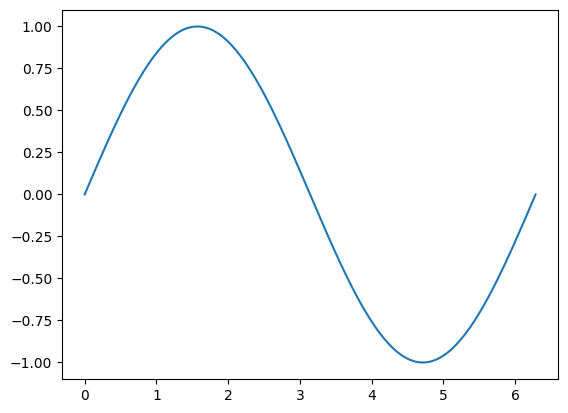

In [327]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)
plt.plot(x, y);  # two variables for x and y position of points, by default draws lines between points and no markers at points

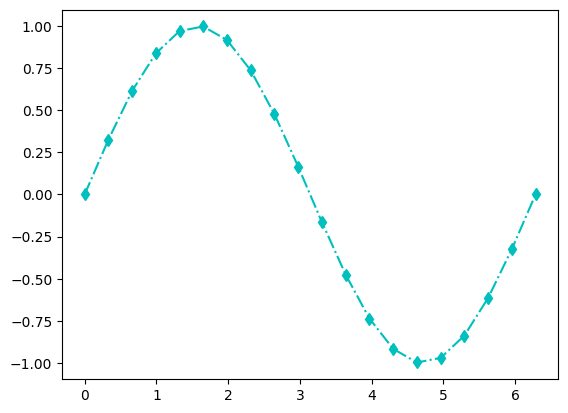

In [328]:
x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)

plt.plot(x, y, 'cd-.');
# format strings: [marker][line][color] ([color][marker][line] is also understood (and common in examples) but may be ambiguous)
# markers: one of .,ov^<>12348spP*hH+xXDd|_
# line: one of - -- -. :
# color: one of rgbcmykw

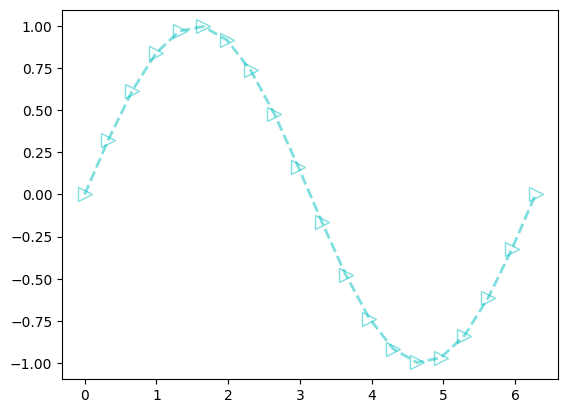

In [329]:
# you can also specify these (and more) parameters as keywords
plt.plot(x, y, color='c', marker='>', linestyle='--', linewidth=2, markersize=10, alpha=0.5, fillstyle='none');

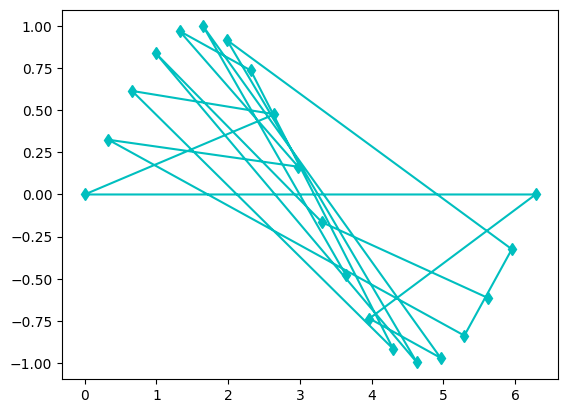

In [330]:
# points are connected in sequence, not by x-value:
indices = np.random.permutation(20)
plt.plot(x[indices], y[indices], 'cd-');

## two API flavours

### Explicit axes objects

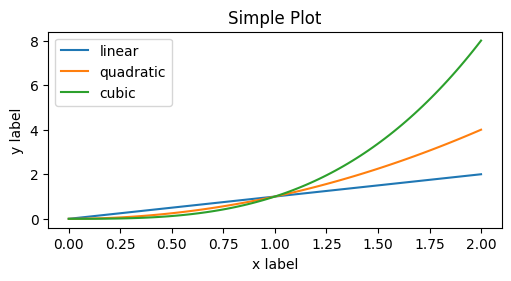

In [331]:
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

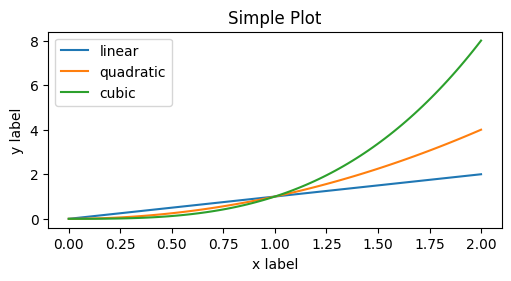

In [332]:
# let matplotlib figure it out (pyplot-style)
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

<div class="alert alert-block alert-info">
<b>API Choice:</b> <br>
<a>
    For complex plots or longer-lived code prefer the axes-object-style.<br>
    For quick (interactive) visualizations pyplot-style is often more convenient.
</a>
</div>

## Plot Types

### scatter plot
- 2D, no connecting lines
- each point can have a separate style (eg size, color)

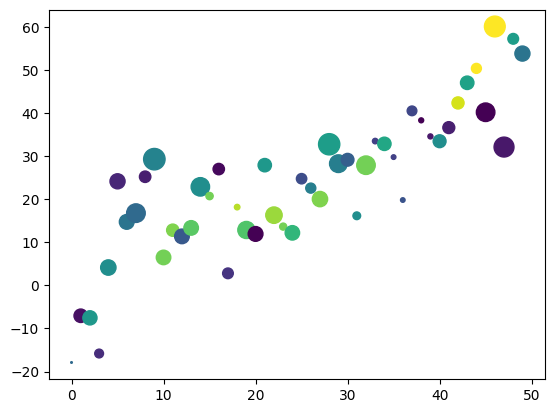

In [333]:
# also shows of the 'data' argument
# come back to that with pandas
data = {'x': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        's': np.random.standard_normal(50)}
data['y'] = data['x'] + 10 * np.random.standard_normal(50)
data['s'] = np.abs(data['s']) * 100

plt.scatter('x', 'y', c='c', s='s', data=data);

### bar plot (like)

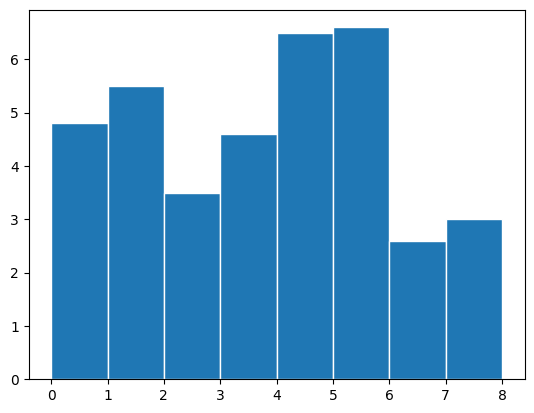

In [334]:
x = 0.5 + np.arange(8)  # to make the bars centered in integer intervals -- there's also an 'align' parameter
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]
plt.bar(x, y, width=1, edgecolor='white');

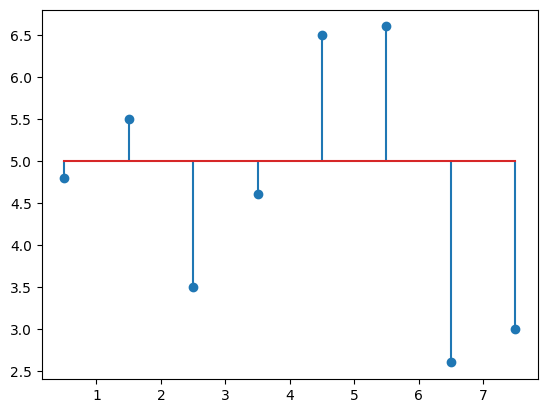

In [335]:
plt.stem(x, y, bottom=5);

### statistics - single distributions

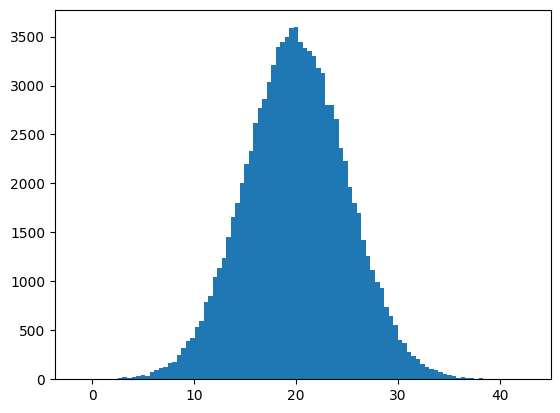

In [336]:
x = np.random.normal(20, 5, 100000)
plt.hist(x, bins=100);

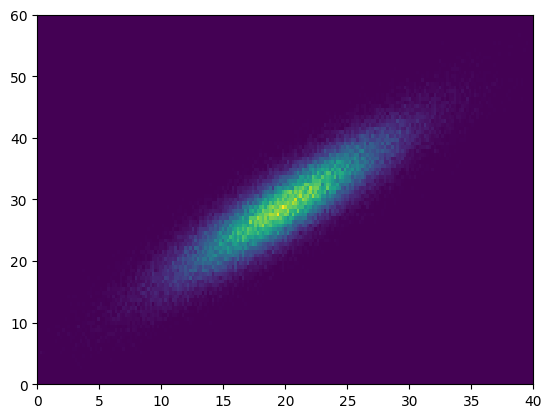

In [337]:
y = 1.2 * x + np.random.normal(5, 3, 100000)
plt.hist2d(x, y, bins=(np.linspace(0, 40, 200), np.linspace(0, 60, 100)));

### statistics -- multiple distributions

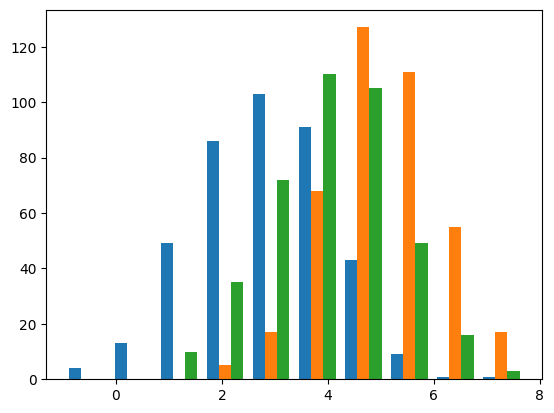

In [338]:
data = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (400, 3))
plt.hist(data);

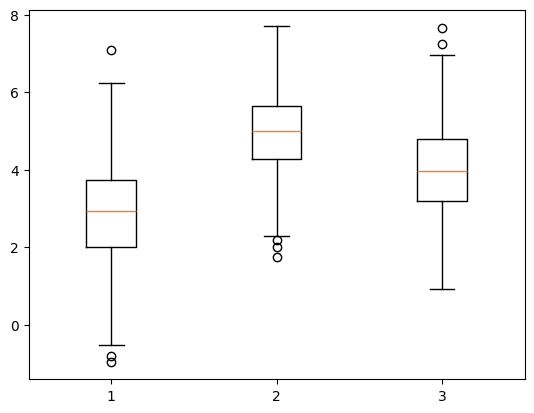

In [339]:
plt.boxplot(data);
# median, 1st and 3rd quartile, quartile +/- 1.5IQR, outliers

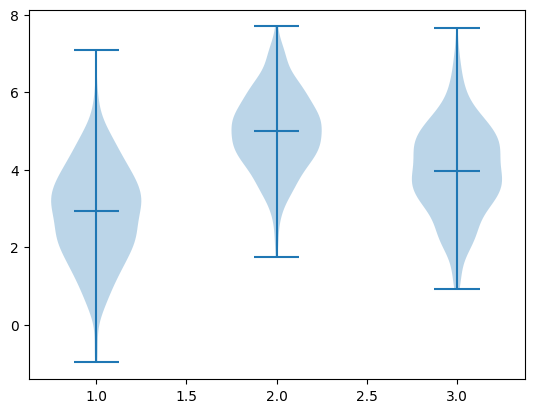

In [340]:
plt.violinplot(data, showmedians=True);

### plotting 2D data

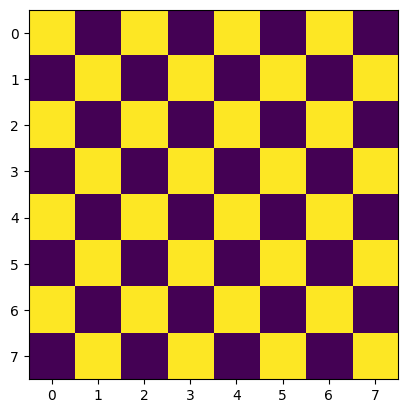

In [341]:
arr = np.zeros((8, 8))
arr[::2, ::2] = 1
arr[1::2, 1::2] = 1
plt.imshow(arr)

In [342]:
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

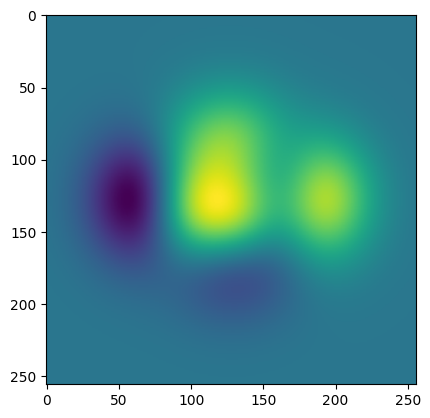

In [343]:
plt.imshow(np.flipud(Z))

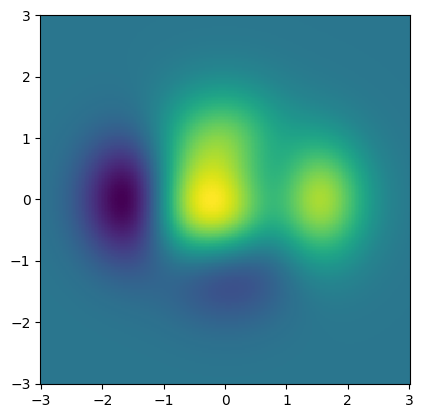

In [344]:
plt.pcolormesh(X, Y, Z);
plt.gca().set_aspect('equal')

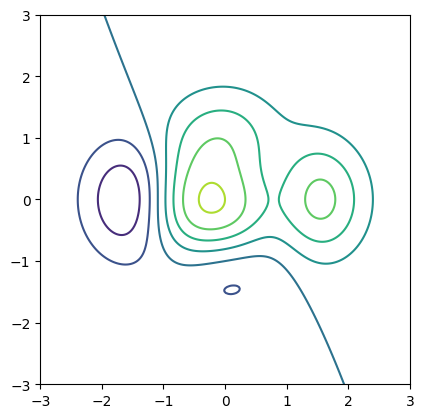

In [345]:
plt.contour(X, Y, Z);
plt.gca().set_aspect('equal')

### plotting 3D data

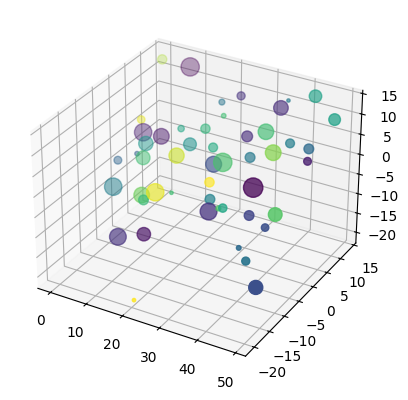

In [346]:
data = {'x': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        's': np.random.standard_normal(50)}
data['y'] = data['x'] + 10 * np.random.standard_normal(50)
data['z'] = data['y'] = 10 * np.random.standard_normal(50)
data['s'] = np.abs(data['s']) * 100

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter('x', 'y', 'z', c='c', s='s', data=data);


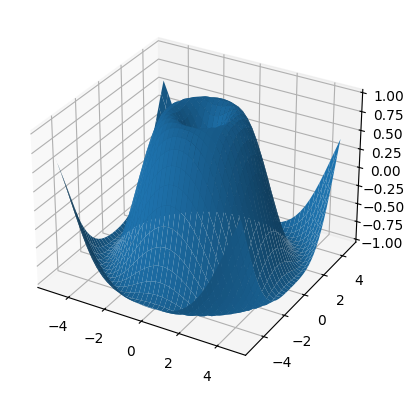

In [347]:
X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z);

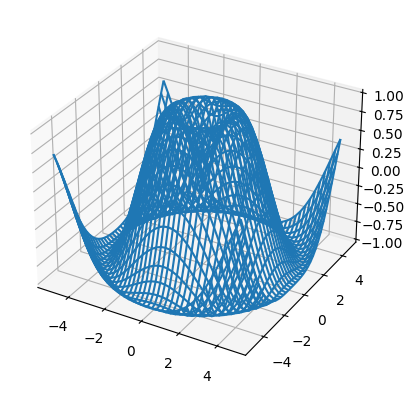

In [348]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_wireframe(X, Y, Z);

## Multiple figure in one plot

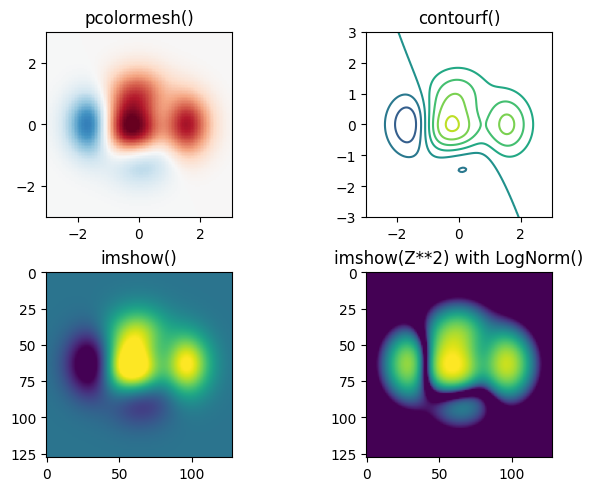

In [349]:
import matplotlib

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
axs[0, 0].set_title('pcolormesh()')
axs[0, 0].set_aspect('equal')

axs[0, 1].contour(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
axs[0, 1].set_title('contourf()')
axs[0, 1].set_aspect('equal')

axs[1, 0].imshow(np.flipud(Z), vmin=-.5, vmax=.8)
axs[1, 0].set_title('imshow()')

axs[1, 1].imshow(np.flipud(Z**2), norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=1))
axs[1, 1].set_title('imshow(Z**2) with LogNorm()');

# plotnine
- alternative API for plotting
- built on top of matplotlib
- works great with pandas
- not used so much in python
- but similar to a **very** popular R library, `ggplot2`
- based on concepts from [A grammar of graphics](https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/GOG.html)

## Installation and Import    

In [350]:
!/home/atreju/.conda/envs/dhbw/bin/pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 5.9 MB/s  0:00:06 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 6.2 MB/s  0:00:01a 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [plotnine]━━ 4/5 [plotnine]ls]


In [351]:
import plotnine as p9  # convention, as usual

## Basic Example

In [352]:
df = pd.read_csv('../data/iris.csv')

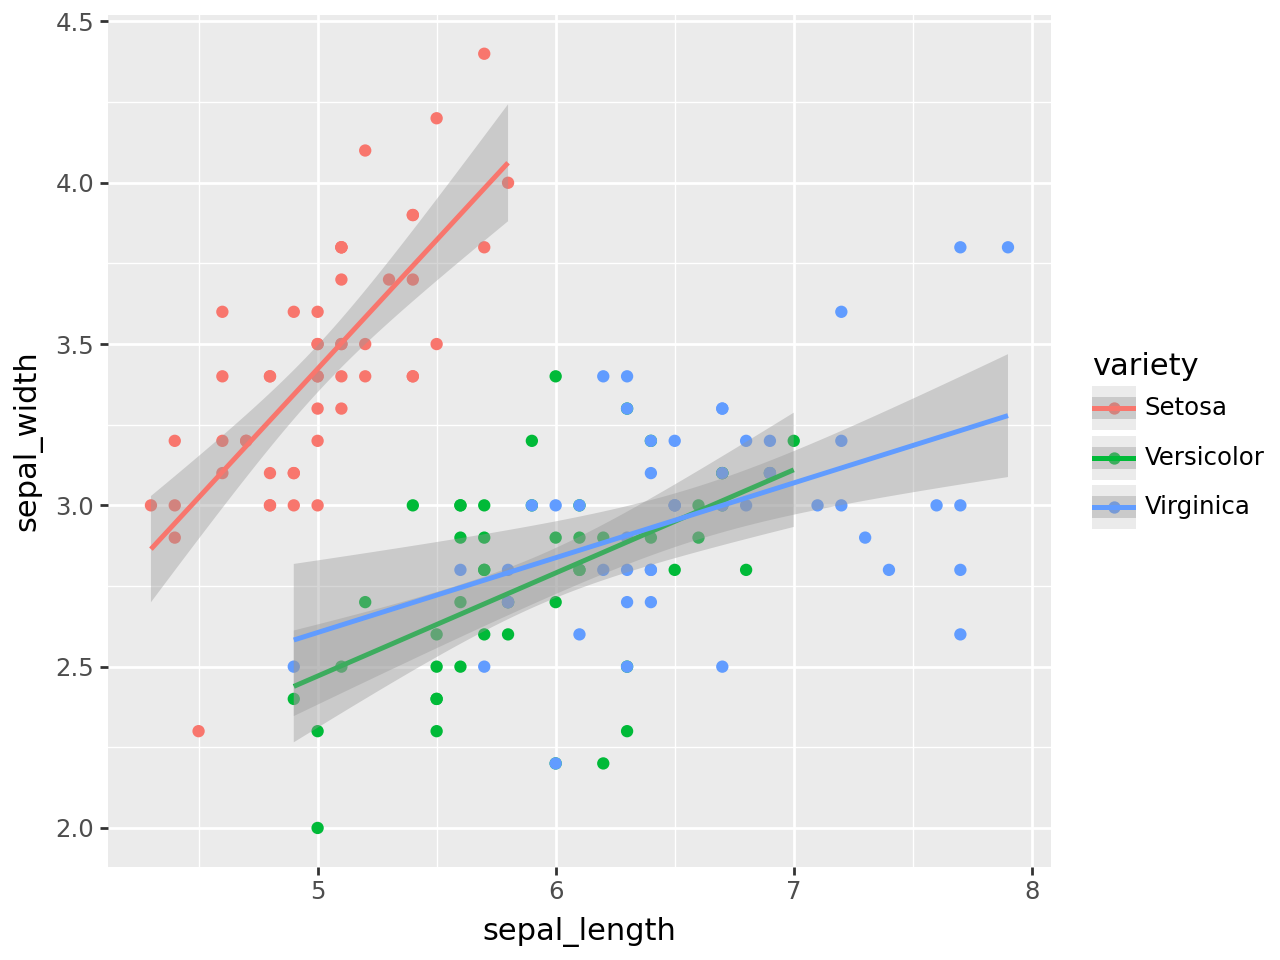

In [353]:
(
    p9.ggplot(df, p9.aes(x='sepal_length', y='sepal_width', colour='variety', group='variety'))
      + p9.geom_point()
      + p9.geom_smooth(method='lm')
)

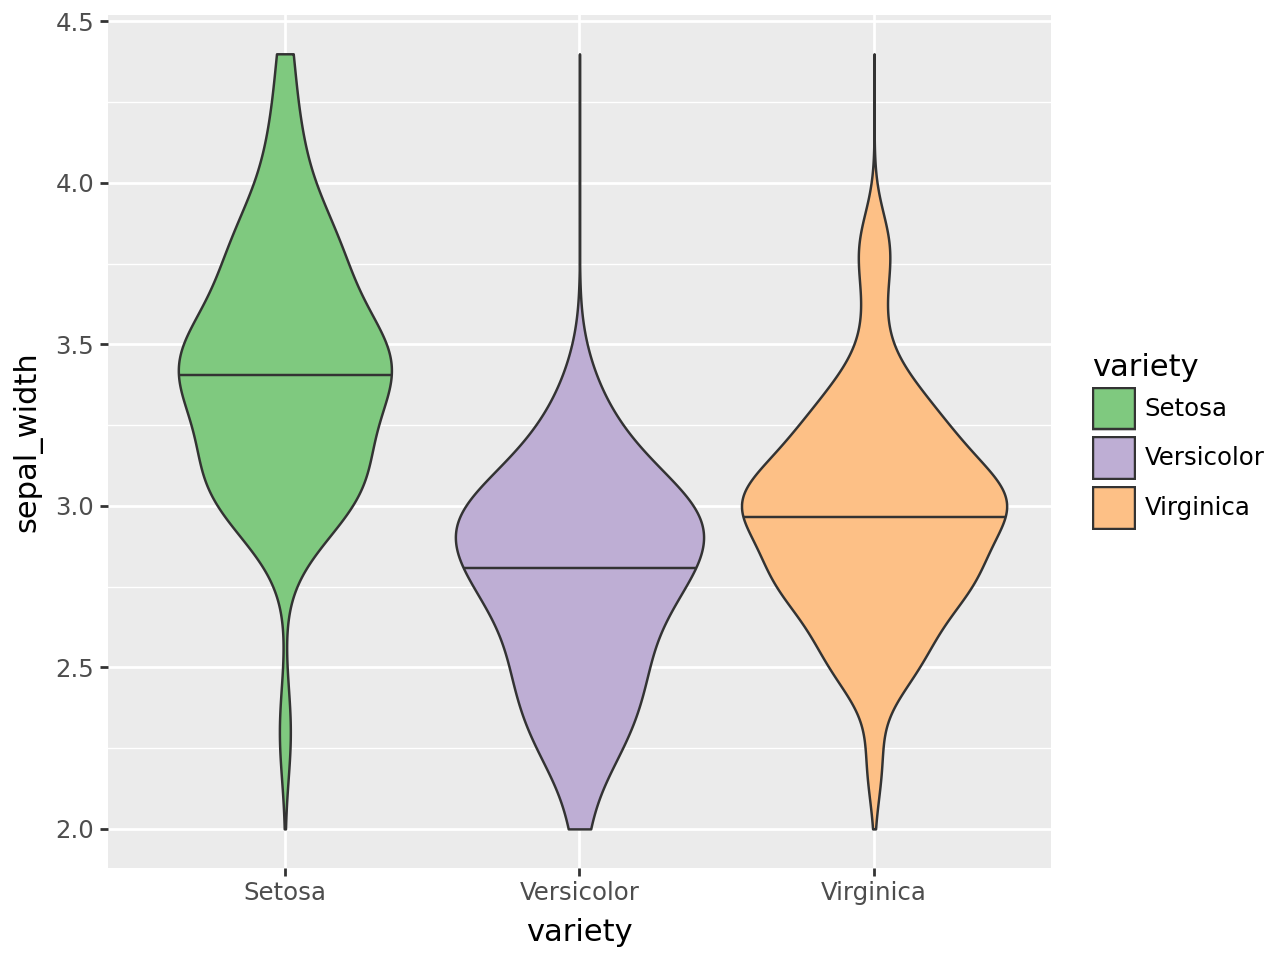

In [354]:
(
  p9.ggplot(df, p9.aes(x='variety', y='sepal_width', fill='variety')) 
      + p9.geom_violin(draw_quantiles=0.5, trim=False)
      + p9.scale_fill_brewer(type='qual')
)

# Seaborn
- another library for plotting & visualization
- specific focus on statistics
- with very high-level API

## Installation and Import

In [355]:
!/home/atreju/.conda/envs/dhbw/bin/pip install seaborn

In [356]:
import seaborn as sns  # guess what: convention
%matplotlib inline

In [357]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Examples

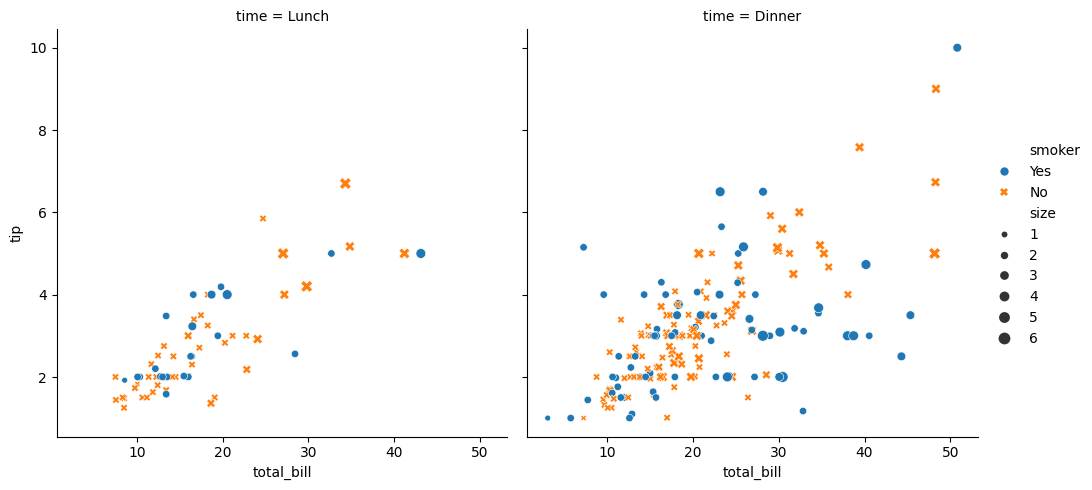

In [358]:
# plot statistical relationship between multiple variables
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
);

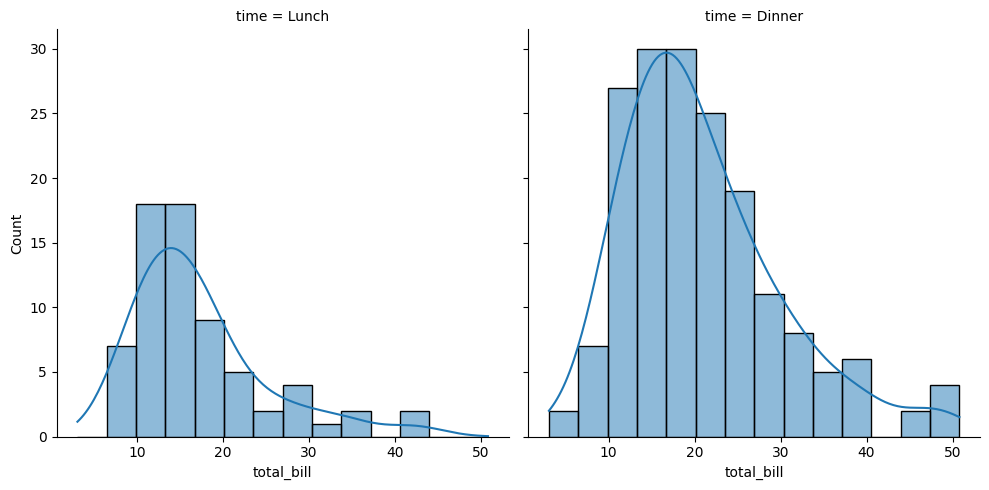

In [359]:
# or for distributions
sns.displot(data=tips, x="total_bill", col="time", kde=True);

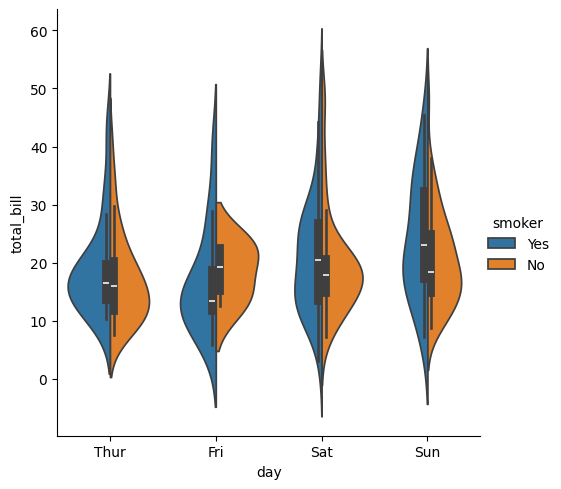

In [360]:
# or more violins
# here called `catplot`(categorical, not the animal :) because we're using many categorical variables
# (day, smoker)
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

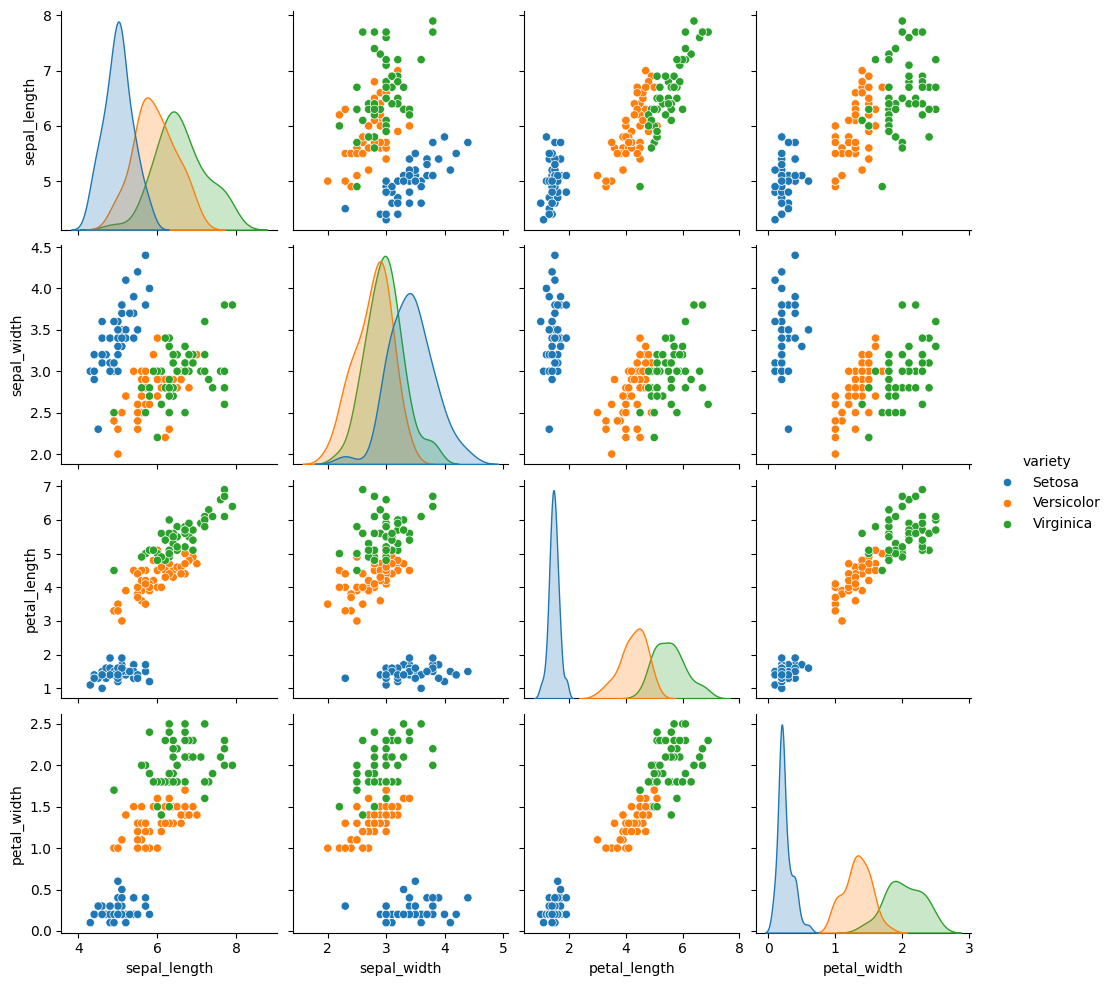

In [361]:
# plot correlations between many variables in one go, and color by group
df = pd.read_csv('../data/iris.csv')
sns.pairplot(data=df, hue="variety");

# scipy

## Installation and Import

In [362]:
!/home/atreju/.conda/envs/dhbw/bin/pip install scipy

In [363]:
# typically import parts of scipy, e.g.
from scipy import linalg

## linear algebra
- everything in the world needs linear algebra, all the time
- and for ML students/practitioners everything needs an extra dose of linear algebra
- so if you learn linear algebra somewhere, pay attention :)

In [364]:
from scipy import linalg

#### linear algebra -- basic operations

In [365]:
# we're doing math, so we're using mathy language...
matrix = np.array([[1, 2, 3], [3, 2, 1], [1, 0, -1]])
matrix = np.arange(9).reshape(3, 3)
matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [366]:
vector1 = np.array([1, 0, 0])
vector2 = np.array([0, 1, 0])
vector3 = np.array([1, 1, 0])

In [367]:
# transpose an array (mirror along diagonal)
matrix.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [368]:
# calculate inner products between vectors
# some things still needed from numpy here

In [369]:
np.dot(vector1, vector2)

np.int64(0)

In [370]:
np.dot(vector1, vector3)

np.int64(1)

In [371]:
# shortcut using `@`-operator for matrix multiplication

In [372]:
vector1 @ vector3

np.int64(1)

In [373]:
# you can also multiply vectors and matrices
np.dot(matrix, vector1)

array([0, 3, 6])

In [374]:
# and you can multiply matrices together

In [375]:
np.dot(matrix, matrix)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

In [376]:
# and outer products :)
np.outer(matrix, matrix)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64]])

In [377]:
# you can calculate the determinant of a matrix
linalg.det(matrix)

np.float64(0.0)

In [378]:
# you can calculate the inverse of a matrix
invertible_matrix = np.array([[1, 2], [3, 4]])
linalg.inv(invertible_matrix)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [379]:
# or pseudo-inverse
linalg.pinv(invertible_matrix)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [380]:
invertible_matrix @ np.linalg.inv(invertible_matrix)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [381]:
# you can calculate eigenvalues and eigenvectors of a matrix
values, vectors = np.linalg.eig(matrix)

In [382]:
values

array([ 1.33484692e+01, -1.34846923e+00, -2.48477279e-16])

In [383]:
vectors

array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]])

In [384]:
np.dot(matrix, vectors[:, 0]) - values[0]*vectors[:, 0]

array([-1.77635684e-15, -8.88178420e-16, -3.55271368e-15])

#### and what do we do all this for?

In [385]:
# mostly for solving systems of linear equations
#   x + 3y + 5z = 10
#  2x + 5y +  z = 8
#  2x + 3y + 8z = 3

we can express that problem as a matrix multiplication
  ⌈1  3  5⌉     ⌈x⌉   ⌈10⌉ 
  |2  5  1|  x  |y| = | 8|
  ⌊2  3  8⌋     ⌊z⌋   ⌊ 3⌋


In [386]:
matrix = np.array([
    [1, 3, 5],
    [2, 5, 1],
    [2, 3, 8]
])

In [387]:
solution = linalg.inv(matrix).dot(np.array([10, 8, 3]))
solution

array([-9.28,  5.16,  0.76])

In [388]:
# put that in for your x, y and z and the equation becomes true...
matrix.dot(solution)

array([10.,  8.,  3.])

**and lots more**
- linear least squares and pseudo-inverses (fitting curves to data)
- matrix decomposition (cholesky, singular value, LU, ...)
- matrix powers/logarithms/trigonometric functions
- some special matrices
- ...

## statistics
- random distributions are almost as important as linear algebra :)
- obviously closely related to generating random numbers in the first place...
- there's lots of them :)

common to all distributions:
- rvs: random variates
- pdf: probability density (continuous)
- pmf: probability mass (discrete)
- cdf: cumulative distribution function
- stats: mean, variance, ...
- ...

In [389]:
from scipy import stats

### intro example

In [390]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

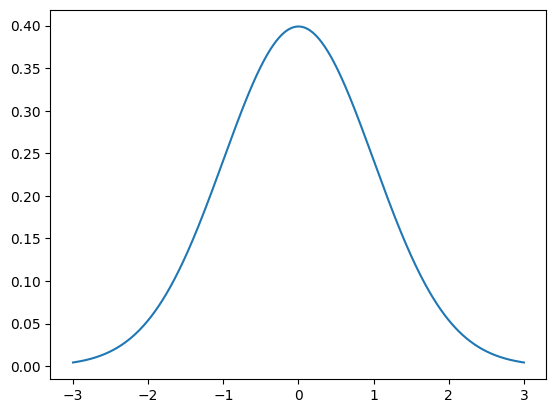

In [391]:
x = np.linspace(-3, 3, 601)
plt.plot(x, stats.norm.pdf(x))

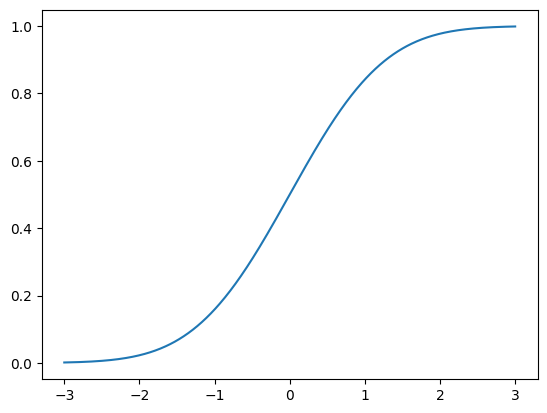

In [392]:
plt.plot(x, stats.norm.cdf(x))

In [393]:
# get mean and variance
stats.norm.stats()

(np.float64(0.0), np.float64(1.0))

In [394]:
# get random samples
stats.norm.rvs(size=10)

array([-1.10358125, -1.31344185, -0.11434074, -0.10637251,  0.89099759,
        0.83675595, -0.21937495, -0.17855165,  0.72531979,  0.99951477])

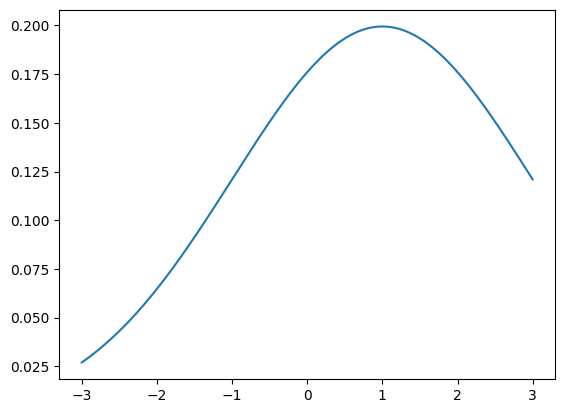

In [395]:
# can specify mean and variance
plt.plot(x, stats.norm.pdf(x, loc=1, scale=2))

### better random numbers

In [396]:
# scipy uses a random number generator from numpy
from numpy.random import default_rng
rng = default_rng(seed=None)  # allows to set a seed
stats.norm.rvs(size=5, random_state=rng)

array([-0.3591697 ,  0.16653555,  0.08290527, -0.84609768,  0.05483123])

### more distributions: discrete -- three examples
- there's 19 different ones in scipy...
- I won't discuss them all...

In [397]:
# discrete: binomial (# successes in fixed number of trials (coin flip)
stats.binom.stats(n=5, p=0.5)

(np.float64(2.5), np.float64(1.25))

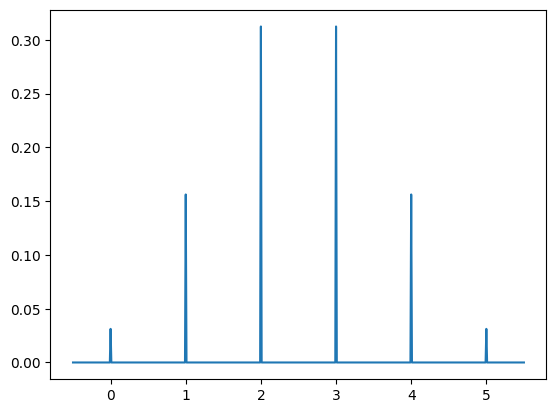

In [398]:
x = np.linspace(-.5, 5.5, 601)
plt.plot(x, stats.binom.pmf(x, n=5, p=0.5))

In [399]:
# discrete: poisson (# independent events in fixed interval)
stats.poisson.stats(mu=10)

(np.float64(10.0), np.float64(10.0))

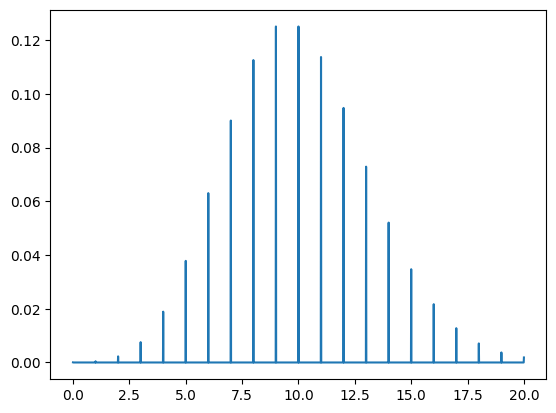

In [406]:
x = np.linspace(0, 20, 2001)
plt.plot(x, stats.poisson.pmf(x, mu=10))

In [401]:
# discrete: uniform
stats.randint.stats(low=5, high=10)  # high is (as usual) exclusive

(np.float64(7.0), np.float64(2.0))

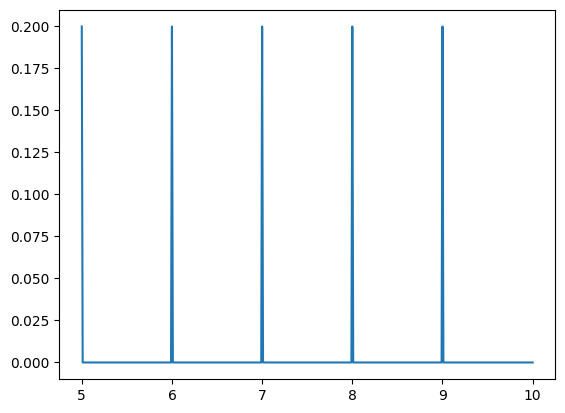

In [402]:
x = np.linspace(5, 10, 501)
plt.plot(x, stats.randint.pmf(x, low=5, high=10))

### more distributions: continuous -- three examples
- there's more than **90** different ones in scipy...
- I won't discuss them all...
- top place should go to the normal distribution, but we had that already above

In [407]:
# exponential: time between events in poisson
stats.expon.stats()

(np.float64(1.0), np.float64(1.0))

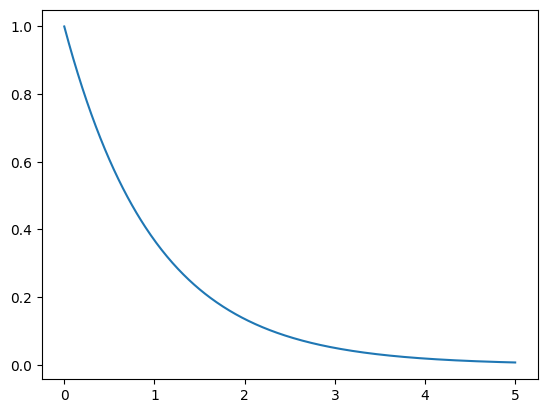

In [408]:
x = np.linspace(0, 5, 501)
plt.plot(x, stats.expon.pdf(x))

In [409]:
# uniform: continous version of discrete `
stats.uniform.stats(loc=5)

(np.float64(5.5), np.float64(0.08333333333333333))

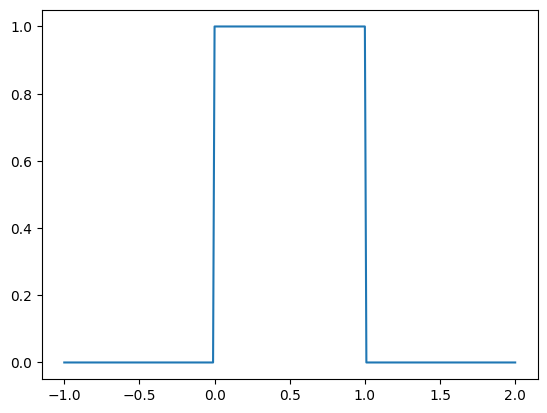

In [410]:
x = np.linspace(-1, 2, 301)
plt.plot(x, stats.uniform.pdf(x))

In [411]:
# beta: common in bayesian statistics
stats.beta.stats(a=2, b=5)

(np.float64(0.2857142857142857), np.float64(0.025510204081632654))

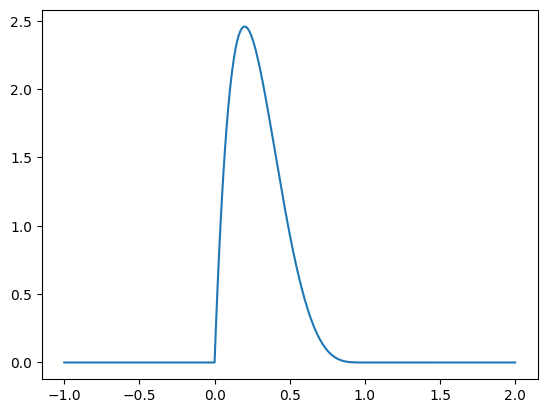

In [412]:
plt.plot(x, stats.beta.pdf(x, a=2, b=5))

## interpolation
- 'guess' function values between measured points

In [413]:
from scipy import interpolate

In [414]:
import numpy as np
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9)

In [415]:
xnew = np.linspace(0, 10, num=1001)
ynew = np.interp(xnew, x, y)

In [416]:
xtrue = np.linspace(0, 10, num=1001)
ytrue = np.cos(-xtrue**2 / 9)

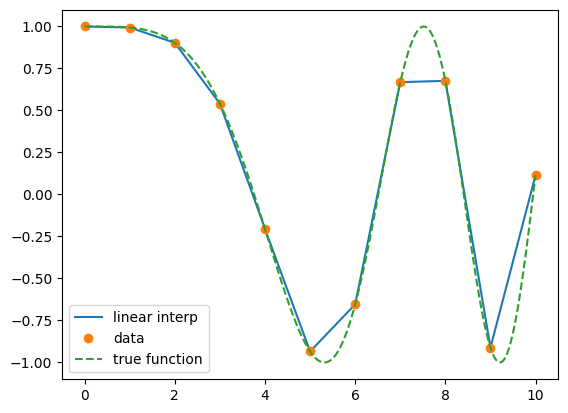

In [417]:
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.plot(xtrue, ytrue, '--', label='true function')
plt.legend(loc='best')
plt.show()

In [418]:
spline_interpolator = interpolate.make_interp_spline(x, y)
ynew = spline_interpolator(xnew)

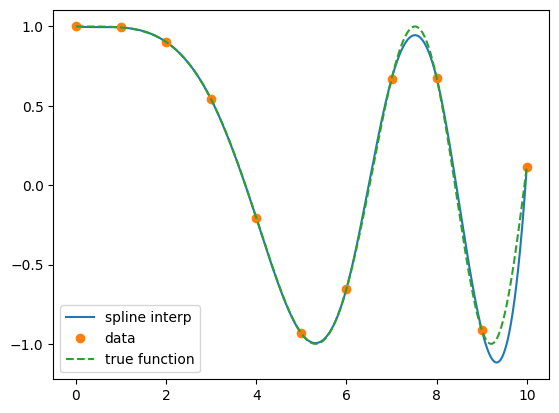

In [420]:
plt.plot(xnew, ynew, '-', label='spline interp')
plt.plot(x, y, 'o', label='data')
plt.plot(xtrue, ytrue, '--', label='true function')
plt.legend(loc='best')
plt.show()

## integration
- numerical integration of functions

In [421]:
from scipy import integrate
import numpy as np

In [422]:
def integrand(t, n, x):
    return np.exp(-x*t) / t**n

In [423]:
def integral(n, x):
    return integrate.quad(integrand, 1, np.inf, args=(n, x))[0]

In [424]:
vectorized_integral = np.vectorize(integral)

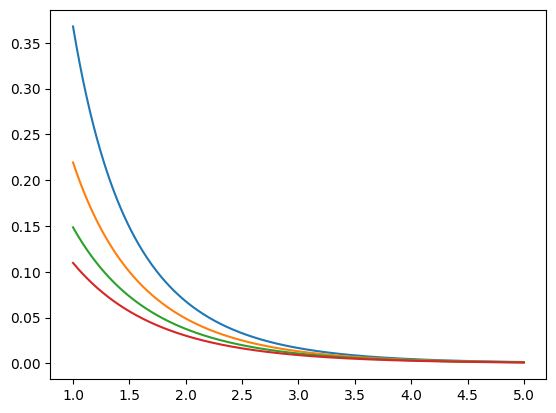

In [425]:
x = np.linspace(1, 5, 401)
plt.plot(x, vectorized_integral(0, x))
plt.plot(x, vectorized_integral(1, x))
plt.plot(x, vectorized_integral(2, x))
plt.plot(x, vectorized_integral(3, x))

## fft
- get frequency components of signals
- very important in analyzing signals

In [426]:
from scipy import fft

In [427]:
x = np.linspace(0, 10*2*np.pi, 10001)
y = (np.sin(x*np.pi) + np.sin(2*x*np.pi) + np.cos(3*np.pi*x)) 

(0.0, 12.566370614359172)

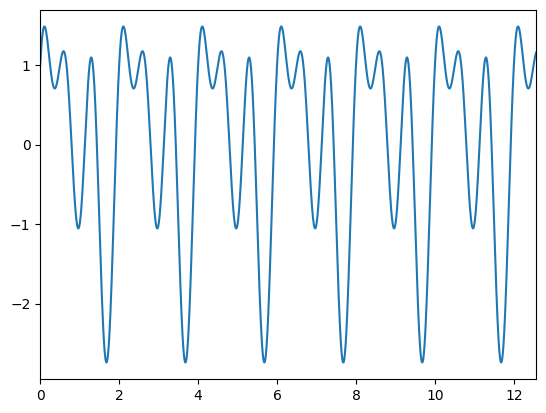

In [428]:
plt.plot(x, y, '-')
plt.gca().set_xlim((0, 4*np.pi))

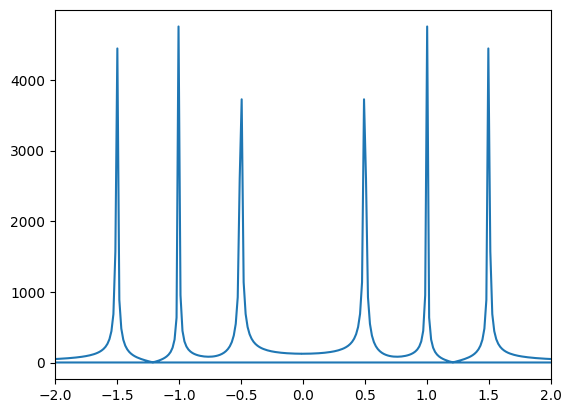

In [429]:
yf = fft.fft(y)
xf = fft.fftfreq(10001, 10*2*np.pi/10000)
plt.plot(xf, np.abs(yf))
plt.gca().set_xlim((-2, 2));

## optimization
- numerically find extrema of functions

In [430]:
from scipy import optimize

In [431]:
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

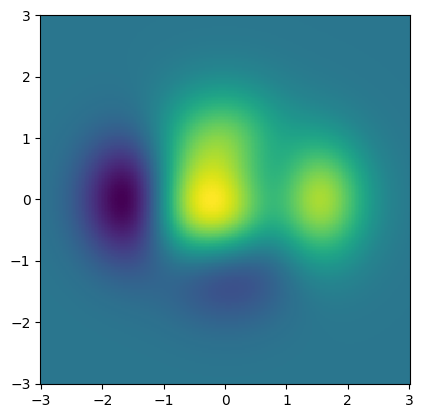

In [432]:
plt.pcolormesh(X, Y, Z)
plt.gca().set_aspect('equal')

In [433]:
def f(params):
    x, y = params
    return -(1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

In [434]:
res1 = optimize.minimize(f, (0, 0), bounds=((-3, 3), (-3, 3)))

In [435]:
res2 = optimize.minimize(f, (3, 0), bounds=((-3, 3), (-3, 3)))

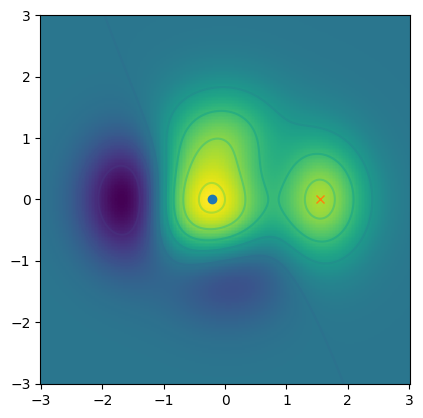

In [436]:
plt.pcolormesh(X, Y, Z)
plt.contour(X, Y, Z)
plt.gca().set_aspect('equal')
plt.plot(*res1.x, 'o')
plt.plot(*res2.x, 'x')

## and more...
- sparse arrays
- signal processing
- special functions
- spatial data structures